In [23]:
# Imports
from PIL import Image
import numpy as np
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt

from tensorflow import set_random_seed
import keras
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout
from keras.optimizers import rmsprop, Adam
from keras import backend as K

from sklearn.model_selection import train_test_split

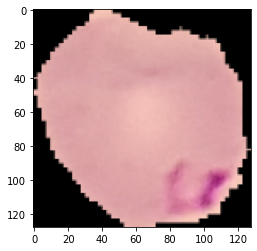

Image height = 128
Image width = 128
Image channels count = 3


In [2]:
# Display first image and image details
data = image.imread('data/training/features/00000.jpg')
pyplot.imshow(data)
pyplot.show()
(imgHeight, imgWidth, imgChannels) = data.shape
print("Image height = " + str(imgHeight))
print("Image width = " + str(imgWidth))

print("Image channels count = " + str(imgChannels))

In [3]:
# Functions needed to load images into a numpy array

# Get the shape of an image
def imageDetails(imagePath):
    im = image.imread(imagePath)
    return im.shape

# Convert a number to a string with a fixed length of 5 digits with optional zero padding
def imageNumToStr(num):
    return str(num).zfill(5)

def loadImagesAsNpArray(imagesFolderPath, startNum, endNum):
    (imgHeight, imgWidth, imgChannels) = imageDetails(imagesFolderPath+'/'+imageNumToStr(startNum)+'.jpg')
    features = np.zeros((endNum - startNum + 1, imgHeight, imgWidth, imgChannels))
    imageCounter = 0
    for num in range(startNum, endNum+1):
        sNum = imageNumToStr(num)
        curImagePath = imagesFolderPath + '/' + sNum + '.jpg'
        print("Loading image = " + curImagePath)
        features[imageCounter, :] = np.array(Image.open(curImagePath))
        imageCounter += 1
    return features

In [53]:
# Load all training images
trainStartNum = 0
trainEndNum = 19999


trainingImagesPath = 'data/training/features'
allTrainingFeatures = loadImagesAsNpArray(trainingImagesPath, trainStartNum, trainEndNum)
allTrainingFeatures = allTrainingFeatures.astype('float')/255

Loading image = data/training/features/00000.jpg
Loading image = data/training/features/00001.jpg
Loading image = data/training/features/00002.jpg
Loading image = data/training/features/00003.jpg
Loading image = data/training/features/00004.jpg
Loading image = data/training/features/00005.jpg
Loading image = data/training/features/00006.jpg
Loading image = data/training/features/00007.jpg
Loading image = data/training/features/00008.jpg
Loading image = data/training/features/00009.jpg
Loading image = data/training/features/00010.jpg
Loading image = data/training/features/00011.jpg
Loading image = data/training/features/00012.jpg
Loading image = data/training/features/00013.jpg
Loading image = data/training/features/00014.jpg
Loading image = data/training/features/00015.jpg
Loading image = data/training/features/00016.jpg
Loading image = data/training/features/00017.jpg
Loading image = data/training/features/00018.jpg
Loading image = data/training/features/00019.jpg
Loading image = data

Loading image = data/training/features/00248.jpg
Loading image = data/training/features/00249.jpg
Loading image = data/training/features/00250.jpg
Loading image = data/training/features/00251.jpg
Loading image = data/training/features/00252.jpg
Loading image = data/training/features/00253.jpg
Loading image = data/training/features/00254.jpg
Loading image = data/training/features/00255.jpg
Loading image = data/training/features/00256.jpg
Loading image = data/training/features/00257.jpg
Loading image = data/training/features/00258.jpg
Loading image = data/training/features/00259.jpg
Loading image = data/training/features/00260.jpg
Loading image = data/training/features/00261.jpg
Loading image = data/training/features/00262.jpg
Loading image = data/training/features/00263.jpg
Loading image = data/training/features/00264.jpg
Loading image = data/training/features/00265.jpg
Loading image = data/training/features/00266.jpg
Loading image = data/training/features/00267.jpg
Loading image = data

Loading image = data/training/features/00498.jpg
Loading image = data/training/features/00499.jpg
Loading image = data/training/features/00500.jpg
Loading image = data/training/features/00501.jpg
Loading image = data/training/features/00502.jpg
Loading image = data/training/features/00503.jpg
Loading image = data/training/features/00504.jpg
Loading image = data/training/features/00505.jpg
Loading image = data/training/features/00506.jpg
Loading image = data/training/features/00507.jpg
Loading image = data/training/features/00508.jpg
Loading image = data/training/features/00509.jpg
Loading image = data/training/features/00510.jpg
Loading image = data/training/features/00511.jpg
Loading image = data/training/features/00512.jpg
Loading image = data/training/features/00513.jpg
Loading image = data/training/features/00514.jpg
Loading image = data/training/features/00515.jpg
Loading image = data/training/features/00516.jpg
Loading image = data/training/features/00517.jpg
Loading image = data

Loading image = data/training/features/00748.jpg
Loading image = data/training/features/00749.jpg
Loading image = data/training/features/00750.jpg
Loading image = data/training/features/00751.jpg
Loading image = data/training/features/00752.jpg
Loading image = data/training/features/00753.jpg
Loading image = data/training/features/00754.jpg
Loading image = data/training/features/00755.jpg
Loading image = data/training/features/00756.jpg
Loading image = data/training/features/00757.jpg
Loading image = data/training/features/00758.jpg
Loading image = data/training/features/00759.jpg
Loading image = data/training/features/00760.jpg
Loading image = data/training/features/00761.jpg
Loading image = data/training/features/00762.jpg
Loading image = data/training/features/00763.jpg
Loading image = data/training/features/00764.jpg
Loading image = data/training/features/00765.jpg
Loading image = data/training/features/00766.jpg
Loading image = data/training/features/00767.jpg
Loading image = data

Loading image = data/training/features/00998.jpg
Loading image = data/training/features/00999.jpg
Loading image = data/training/features/01000.jpg
Loading image = data/training/features/01001.jpg
Loading image = data/training/features/01002.jpg
Loading image = data/training/features/01003.jpg
Loading image = data/training/features/01004.jpg
Loading image = data/training/features/01005.jpg
Loading image = data/training/features/01006.jpg
Loading image = data/training/features/01007.jpg
Loading image = data/training/features/01008.jpg
Loading image = data/training/features/01009.jpg
Loading image = data/training/features/01010.jpg
Loading image = data/training/features/01011.jpg
Loading image = data/training/features/01012.jpg
Loading image = data/training/features/01013.jpg
Loading image = data/training/features/01014.jpg
Loading image = data/training/features/01015.jpg
Loading image = data/training/features/01016.jpg
Loading image = data/training/features/01017.jpg
Loading image = data

Loading image = data/training/features/01243.jpg
Loading image = data/training/features/01244.jpg
Loading image = data/training/features/01245.jpg
Loading image = data/training/features/01246.jpg
Loading image = data/training/features/01247.jpg
Loading image = data/training/features/01248.jpg
Loading image = data/training/features/01249.jpg
Loading image = data/training/features/01250.jpg
Loading image = data/training/features/01251.jpg
Loading image = data/training/features/01252.jpg
Loading image = data/training/features/01253.jpg
Loading image = data/training/features/01254.jpg
Loading image = data/training/features/01255.jpg
Loading image = data/training/features/01256.jpg
Loading image = data/training/features/01257.jpg
Loading image = data/training/features/01258.jpg
Loading image = data/training/features/01259.jpg
Loading image = data/training/features/01260.jpg
Loading image = data/training/features/01261.jpg
Loading image = data/training/features/01262.jpg
Loading image = data

Loading image = data/training/features/01492.jpg
Loading image = data/training/features/01493.jpg
Loading image = data/training/features/01494.jpg
Loading image = data/training/features/01495.jpg
Loading image = data/training/features/01496.jpg
Loading image = data/training/features/01497.jpg
Loading image = data/training/features/01498.jpg
Loading image = data/training/features/01499.jpg
Loading image = data/training/features/01500.jpg
Loading image = data/training/features/01501.jpg
Loading image = data/training/features/01502.jpg
Loading image = data/training/features/01503.jpg
Loading image = data/training/features/01504.jpg
Loading image = data/training/features/01505.jpg
Loading image = data/training/features/01506.jpg
Loading image = data/training/features/01507.jpg
Loading image = data/training/features/01508.jpg
Loading image = data/training/features/01509.jpg
Loading image = data/training/features/01510.jpg
Loading image = data/training/features/01511.jpg
Loading image = data

Loading image = data/training/features/01742.jpg
Loading image = data/training/features/01743.jpg
Loading image = data/training/features/01744.jpg
Loading image = data/training/features/01745.jpg
Loading image = data/training/features/01746.jpg
Loading image = data/training/features/01747.jpg
Loading image = data/training/features/01748.jpg
Loading image = data/training/features/01749.jpg
Loading image = data/training/features/01750.jpg
Loading image = data/training/features/01751.jpg
Loading image = data/training/features/01752.jpg
Loading image = data/training/features/01753.jpg
Loading image = data/training/features/01754.jpg
Loading image = data/training/features/01755.jpg
Loading image = data/training/features/01756.jpg
Loading image = data/training/features/01757.jpg
Loading image = data/training/features/01758.jpg
Loading image = data/training/features/01759.jpg
Loading image = data/training/features/01760.jpg
Loading image = data/training/features/01761.jpg
Loading image = data

Loading image = data/training/features/01996.jpg
Loading image = data/training/features/01997.jpg
Loading image = data/training/features/01998.jpg
Loading image = data/training/features/01999.jpg
Loading image = data/training/features/02000.jpg
Loading image = data/training/features/02001.jpg
Loading image = data/training/features/02002.jpg
Loading image = data/training/features/02003.jpg
Loading image = data/training/features/02004.jpg
Loading image = data/training/features/02005.jpg
Loading image = data/training/features/02006.jpg
Loading image = data/training/features/02007.jpg
Loading image = data/training/features/02008.jpg
Loading image = data/training/features/02009.jpg
Loading image = data/training/features/02010.jpg
Loading image = data/training/features/02011.jpg
Loading image = data/training/features/02012.jpg
Loading image = data/training/features/02013.jpg
Loading image = data/training/features/02014.jpg
Loading image = data/training/features/02015.jpg
Loading image = data

Loading image = data/training/features/02246.jpg
Loading image = data/training/features/02247.jpg
Loading image = data/training/features/02248.jpg
Loading image = data/training/features/02249.jpg
Loading image = data/training/features/02250.jpg
Loading image = data/training/features/02251.jpg
Loading image = data/training/features/02252.jpg
Loading image = data/training/features/02253.jpg
Loading image = data/training/features/02254.jpg
Loading image = data/training/features/02255.jpg
Loading image = data/training/features/02256.jpg
Loading image = data/training/features/02257.jpg
Loading image = data/training/features/02258.jpg
Loading image = data/training/features/02259.jpg
Loading image = data/training/features/02260.jpg
Loading image = data/training/features/02261.jpg
Loading image = data/training/features/02262.jpg
Loading image = data/training/features/02263.jpg
Loading image = data/training/features/02264.jpg
Loading image = data/training/features/02265.jpg
Loading image = data

Loading image = data/training/features/02492.jpg
Loading image = data/training/features/02493.jpg
Loading image = data/training/features/02494.jpg
Loading image = data/training/features/02495.jpg
Loading image = data/training/features/02496.jpg
Loading image = data/training/features/02497.jpg
Loading image = data/training/features/02498.jpg
Loading image = data/training/features/02499.jpg
Loading image = data/training/features/02500.jpg
Loading image = data/training/features/02501.jpg
Loading image = data/training/features/02502.jpg
Loading image = data/training/features/02503.jpg
Loading image = data/training/features/02504.jpg
Loading image = data/training/features/02505.jpg
Loading image = data/training/features/02506.jpg
Loading image = data/training/features/02507.jpg
Loading image = data/training/features/02508.jpg
Loading image = data/training/features/02509.jpg
Loading image = data/training/features/02510.jpg
Loading image = data/training/features/02511.jpg
Loading image = data

Loading image = data/training/features/02739.jpg
Loading image = data/training/features/02740.jpg
Loading image = data/training/features/02741.jpg
Loading image = data/training/features/02742.jpg
Loading image = data/training/features/02743.jpg
Loading image = data/training/features/02744.jpg
Loading image = data/training/features/02745.jpg
Loading image = data/training/features/02746.jpg
Loading image = data/training/features/02747.jpg
Loading image = data/training/features/02748.jpg
Loading image = data/training/features/02749.jpg
Loading image = data/training/features/02750.jpg
Loading image = data/training/features/02751.jpg
Loading image = data/training/features/02752.jpg
Loading image = data/training/features/02753.jpg
Loading image = data/training/features/02754.jpg
Loading image = data/training/features/02755.jpg
Loading image = data/training/features/02756.jpg
Loading image = data/training/features/02757.jpg
Loading image = data/training/features/02758.jpg
Loading image = data

Loading image = data/training/features/02992.jpg
Loading image = data/training/features/02993.jpg
Loading image = data/training/features/02994.jpg
Loading image = data/training/features/02995.jpg
Loading image = data/training/features/02996.jpg
Loading image = data/training/features/02997.jpg
Loading image = data/training/features/02998.jpg
Loading image = data/training/features/02999.jpg
Loading image = data/training/features/03000.jpg
Loading image = data/training/features/03001.jpg
Loading image = data/training/features/03002.jpg
Loading image = data/training/features/03003.jpg
Loading image = data/training/features/03004.jpg
Loading image = data/training/features/03005.jpg
Loading image = data/training/features/03006.jpg
Loading image = data/training/features/03007.jpg
Loading image = data/training/features/03008.jpg
Loading image = data/training/features/03009.jpg
Loading image = data/training/features/03010.jpg
Loading image = data/training/features/03011.jpg
Loading image = data

Loading image = data/training/features/03243.jpg
Loading image = data/training/features/03244.jpg
Loading image = data/training/features/03245.jpg
Loading image = data/training/features/03246.jpg
Loading image = data/training/features/03247.jpg
Loading image = data/training/features/03248.jpg
Loading image = data/training/features/03249.jpg
Loading image = data/training/features/03250.jpg
Loading image = data/training/features/03251.jpg
Loading image = data/training/features/03252.jpg
Loading image = data/training/features/03253.jpg
Loading image = data/training/features/03254.jpg
Loading image = data/training/features/03255.jpg
Loading image = data/training/features/03256.jpg
Loading image = data/training/features/03257.jpg
Loading image = data/training/features/03258.jpg
Loading image = data/training/features/03259.jpg
Loading image = data/training/features/03260.jpg
Loading image = data/training/features/03261.jpg
Loading image = data/training/features/03262.jpg
Loading image = data

Loading image = data/training/features/03488.jpg
Loading image = data/training/features/03489.jpg
Loading image = data/training/features/03490.jpg
Loading image = data/training/features/03491.jpg
Loading image = data/training/features/03492.jpg
Loading image = data/training/features/03493.jpg
Loading image = data/training/features/03494.jpg
Loading image = data/training/features/03495.jpg
Loading image = data/training/features/03496.jpg
Loading image = data/training/features/03497.jpg
Loading image = data/training/features/03498.jpg
Loading image = data/training/features/03499.jpg
Loading image = data/training/features/03500.jpg
Loading image = data/training/features/03501.jpg
Loading image = data/training/features/03502.jpg
Loading image = data/training/features/03503.jpg
Loading image = data/training/features/03504.jpg
Loading image = data/training/features/03505.jpg
Loading image = data/training/features/03506.jpg
Loading image = data/training/features/03507.jpg
Loading image = data

Loading image = data/training/features/03729.jpg
Loading image = data/training/features/03730.jpg
Loading image = data/training/features/03731.jpg
Loading image = data/training/features/03732.jpg
Loading image = data/training/features/03733.jpg
Loading image = data/training/features/03734.jpg
Loading image = data/training/features/03735.jpg
Loading image = data/training/features/03736.jpg
Loading image = data/training/features/03737.jpg
Loading image = data/training/features/03738.jpg
Loading image = data/training/features/03739.jpg
Loading image = data/training/features/03740.jpg
Loading image = data/training/features/03741.jpg
Loading image = data/training/features/03742.jpg
Loading image = data/training/features/03743.jpg
Loading image = data/training/features/03744.jpg
Loading image = data/training/features/03745.jpg
Loading image = data/training/features/03746.jpg
Loading image = data/training/features/03747.jpg
Loading image = data/training/features/03748.jpg
Loading image = data

Loading image = data/training/features/03973.jpg
Loading image = data/training/features/03974.jpg
Loading image = data/training/features/03975.jpg
Loading image = data/training/features/03976.jpg
Loading image = data/training/features/03977.jpg
Loading image = data/training/features/03978.jpg
Loading image = data/training/features/03979.jpg
Loading image = data/training/features/03980.jpg
Loading image = data/training/features/03981.jpg
Loading image = data/training/features/03982.jpg
Loading image = data/training/features/03983.jpg
Loading image = data/training/features/03984.jpg
Loading image = data/training/features/03985.jpg
Loading image = data/training/features/03986.jpg
Loading image = data/training/features/03987.jpg
Loading image = data/training/features/03988.jpg
Loading image = data/training/features/03989.jpg
Loading image = data/training/features/03990.jpg
Loading image = data/training/features/03991.jpg
Loading image = data/training/features/03992.jpg
Loading image = data

Loading image = data/training/features/04224.jpg
Loading image = data/training/features/04225.jpg
Loading image = data/training/features/04226.jpg
Loading image = data/training/features/04227.jpg
Loading image = data/training/features/04228.jpg
Loading image = data/training/features/04229.jpg
Loading image = data/training/features/04230.jpg
Loading image = data/training/features/04231.jpg
Loading image = data/training/features/04232.jpg
Loading image = data/training/features/04233.jpg
Loading image = data/training/features/04234.jpg
Loading image = data/training/features/04235.jpg
Loading image = data/training/features/04236.jpg
Loading image = data/training/features/04237.jpg
Loading image = data/training/features/04238.jpg
Loading image = data/training/features/04239.jpg
Loading image = data/training/features/04240.jpg
Loading image = data/training/features/04241.jpg
Loading image = data/training/features/04242.jpg
Loading image = data/training/features/04243.jpg
Loading image = data

Loading image = data/training/features/04469.jpg
Loading image = data/training/features/04470.jpg
Loading image = data/training/features/04471.jpg
Loading image = data/training/features/04472.jpg
Loading image = data/training/features/04473.jpg
Loading image = data/training/features/04474.jpg
Loading image = data/training/features/04475.jpg
Loading image = data/training/features/04476.jpg
Loading image = data/training/features/04477.jpg
Loading image = data/training/features/04478.jpg
Loading image = data/training/features/04479.jpg
Loading image = data/training/features/04480.jpg
Loading image = data/training/features/04481.jpg
Loading image = data/training/features/04482.jpg
Loading image = data/training/features/04483.jpg
Loading image = data/training/features/04484.jpg
Loading image = data/training/features/04485.jpg
Loading image = data/training/features/04486.jpg
Loading image = data/training/features/04487.jpg
Loading image = data/training/features/04488.jpg
Loading image = data

Loading image = data/training/features/04720.jpg
Loading image = data/training/features/04721.jpg
Loading image = data/training/features/04722.jpg
Loading image = data/training/features/04723.jpg
Loading image = data/training/features/04724.jpg
Loading image = data/training/features/04725.jpg
Loading image = data/training/features/04726.jpg
Loading image = data/training/features/04727.jpg
Loading image = data/training/features/04728.jpg
Loading image = data/training/features/04729.jpg
Loading image = data/training/features/04730.jpg
Loading image = data/training/features/04731.jpg
Loading image = data/training/features/04732.jpg
Loading image = data/training/features/04733.jpg
Loading image = data/training/features/04734.jpg
Loading image = data/training/features/04735.jpg
Loading image = data/training/features/04736.jpg
Loading image = data/training/features/04737.jpg
Loading image = data/training/features/04738.jpg
Loading image = data/training/features/04739.jpg
Loading image = data

Loading image = data/training/features/04973.jpg
Loading image = data/training/features/04974.jpg
Loading image = data/training/features/04975.jpg
Loading image = data/training/features/04976.jpg
Loading image = data/training/features/04977.jpg
Loading image = data/training/features/04978.jpg
Loading image = data/training/features/04979.jpg
Loading image = data/training/features/04980.jpg
Loading image = data/training/features/04981.jpg
Loading image = data/training/features/04982.jpg
Loading image = data/training/features/04983.jpg
Loading image = data/training/features/04984.jpg
Loading image = data/training/features/04985.jpg
Loading image = data/training/features/04986.jpg
Loading image = data/training/features/04987.jpg
Loading image = data/training/features/04988.jpg
Loading image = data/training/features/04989.jpg
Loading image = data/training/features/04990.jpg
Loading image = data/training/features/04991.jpg
Loading image = data/training/features/04992.jpg
Loading image = data

Loading image = data/training/features/05221.jpg
Loading image = data/training/features/05222.jpg
Loading image = data/training/features/05223.jpg
Loading image = data/training/features/05224.jpg
Loading image = data/training/features/05225.jpg
Loading image = data/training/features/05226.jpg
Loading image = data/training/features/05227.jpg
Loading image = data/training/features/05228.jpg
Loading image = data/training/features/05229.jpg
Loading image = data/training/features/05230.jpg
Loading image = data/training/features/05231.jpg
Loading image = data/training/features/05232.jpg
Loading image = data/training/features/05233.jpg
Loading image = data/training/features/05234.jpg
Loading image = data/training/features/05235.jpg
Loading image = data/training/features/05236.jpg
Loading image = data/training/features/05237.jpg
Loading image = data/training/features/05238.jpg
Loading image = data/training/features/05239.jpg
Loading image = data/training/features/05240.jpg
Loading image = data

Loading image = data/training/features/05473.jpg
Loading image = data/training/features/05474.jpg
Loading image = data/training/features/05475.jpg
Loading image = data/training/features/05476.jpg
Loading image = data/training/features/05477.jpg
Loading image = data/training/features/05478.jpg
Loading image = data/training/features/05479.jpg
Loading image = data/training/features/05480.jpg
Loading image = data/training/features/05481.jpg
Loading image = data/training/features/05482.jpg
Loading image = data/training/features/05483.jpg
Loading image = data/training/features/05484.jpg
Loading image = data/training/features/05485.jpg
Loading image = data/training/features/05486.jpg
Loading image = data/training/features/05487.jpg
Loading image = data/training/features/05488.jpg
Loading image = data/training/features/05489.jpg
Loading image = data/training/features/05490.jpg
Loading image = data/training/features/05491.jpg
Loading image = data/training/features/05492.jpg
Loading image = data

Loading image = data/training/features/05725.jpg
Loading image = data/training/features/05726.jpg
Loading image = data/training/features/05727.jpg
Loading image = data/training/features/05728.jpg
Loading image = data/training/features/05729.jpg
Loading image = data/training/features/05730.jpg
Loading image = data/training/features/05731.jpg
Loading image = data/training/features/05732.jpg
Loading image = data/training/features/05733.jpg
Loading image = data/training/features/05734.jpg
Loading image = data/training/features/05735.jpg
Loading image = data/training/features/05736.jpg
Loading image = data/training/features/05737.jpg
Loading image = data/training/features/05738.jpg
Loading image = data/training/features/05739.jpg
Loading image = data/training/features/05740.jpg
Loading image = data/training/features/05741.jpg
Loading image = data/training/features/05742.jpg
Loading image = data/training/features/05743.jpg
Loading image = data/training/features/05744.jpg
Loading image = data

Loading image = data/training/features/05977.jpg
Loading image = data/training/features/05978.jpg
Loading image = data/training/features/05979.jpg
Loading image = data/training/features/05980.jpg
Loading image = data/training/features/05981.jpg
Loading image = data/training/features/05982.jpg
Loading image = data/training/features/05983.jpg
Loading image = data/training/features/05984.jpg
Loading image = data/training/features/05985.jpg
Loading image = data/training/features/05986.jpg
Loading image = data/training/features/05987.jpg
Loading image = data/training/features/05988.jpg
Loading image = data/training/features/05989.jpg
Loading image = data/training/features/05990.jpg
Loading image = data/training/features/05991.jpg
Loading image = data/training/features/05992.jpg
Loading image = data/training/features/05993.jpg
Loading image = data/training/features/05994.jpg
Loading image = data/training/features/05995.jpg
Loading image = data/training/features/05996.jpg
Loading image = data

Loading image = data/training/features/06222.jpg
Loading image = data/training/features/06223.jpg
Loading image = data/training/features/06224.jpg
Loading image = data/training/features/06225.jpg
Loading image = data/training/features/06226.jpg
Loading image = data/training/features/06227.jpg
Loading image = data/training/features/06228.jpg
Loading image = data/training/features/06229.jpg
Loading image = data/training/features/06230.jpg
Loading image = data/training/features/06231.jpg
Loading image = data/training/features/06232.jpg
Loading image = data/training/features/06233.jpg
Loading image = data/training/features/06234.jpg
Loading image = data/training/features/06235.jpg
Loading image = data/training/features/06236.jpg
Loading image = data/training/features/06237.jpg
Loading image = data/training/features/06238.jpg
Loading image = data/training/features/06239.jpg
Loading image = data/training/features/06240.jpg
Loading image = data/training/features/06241.jpg
Loading image = data

Loading image = data/training/features/06473.jpg
Loading image = data/training/features/06474.jpg
Loading image = data/training/features/06475.jpg
Loading image = data/training/features/06476.jpg
Loading image = data/training/features/06477.jpg
Loading image = data/training/features/06478.jpg
Loading image = data/training/features/06479.jpg
Loading image = data/training/features/06480.jpg
Loading image = data/training/features/06481.jpg
Loading image = data/training/features/06482.jpg
Loading image = data/training/features/06483.jpg
Loading image = data/training/features/06484.jpg
Loading image = data/training/features/06485.jpg
Loading image = data/training/features/06486.jpg
Loading image = data/training/features/06487.jpg
Loading image = data/training/features/06488.jpg
Loading image = data/training/features/06489.jpg
Loading image = data/training/features/06490.jpg
Loading image = data/training/features/06491.jpg
Loading image = data/training/features/06492.jpg
Loading image = data

Loading image = data/training/features/06726.jpg
Loading image = data/training/features/06727.jpg
Loading image = data/training/features/06728.jpg
Loading image = data/training/features/06729.jpg
Loading image = data/training/features/06730.jpg
Loading image = data/training/features/06731.jpg
Loading image = data/training/features/06732.jpg
Loading image = data/training/features/06733.jpg
Loading image = data/training/features/06734.jpg
Loading image = data/training/features/06735.jpg
Loading image = data/training/features/06736.jpg
Loading image = data/training/features/06737.jpg
Loading image = data/training/features/06738.jpg
Loading image = data/training/features/06739.jpg
Loading image = data/training/features/06740.jpg
Loading image = data/training/features/06741.jpg
Loading image = data/training/features/06742.jpg
Loading image = data/training/features/06743.jpg
Loading image = data/training/features/06744.jpg
Loading image = data/training/features/06745.jpg
Loading image = data

Loading image = data/training/features/06978.jpg
Loading image = data/training/features/06979.jpg
Loading image = data/training/features/06980.jpg
Loading image = data/training/features/06981.jpg
Loading image = data/training/features/06982.jpg
Loading image = data/training/features/06983.jpg
Loading image = data/training/features/06984.jpg
Loading image = data/training/features/06985.jpg
Loading image = data/training/features/06986.jpg
Loading image = data/training/features/06987.jpg
Loading image = data/training/features/06988.jpg
Loading image = data/training/features/06989.jpg
Loading image = data/training/features/06990.jpg
Loading image = data/training/features/06991.jpg
Loading image = data/training/features/06992.jpg
Loading image = data/training/features/06993.jpg
Loading image = data/training/features/06994.jpg
Loading image = data/training/features/06995.jpg
Loading image = data/training/features/06996.jpg
Loading image = data/training/features/06997.jpg
Loading image = data

Loading image = data/training/features/07234.jpg
Loading image = data/training/features/07235.jpg
Loading image = data/training/features/07236.jpg
Loading image = data/training/features/07237.jpg
Loading image = data/training/features/07238.jpg
Loading image = data/training/features/07239.jpg
Loading image = data/training/features/07240.jpg
Loading image = data/training/features/07241.jpg
Loading image = data/training/features/07242.jpg
Loading image = data/training/features/07243.jpg
Loading image = data/training/features/07244.jpg
Loading image = data/training/features/07245.jpg
Loading image = data/training/features/07246.jpg
Loading image = data/training/features/07247.jpg
Loading image = data/training/features/07248.jpg
Loading image = data/training/features/07249.jpg
Loading image = data/training/features/07250.jpg
Loading image = data/training/features/07251.jpg
Loading image = data/training/features/07252.jpg
Loading image = data/training/features/07253.jpg
Loading image = data

Loading image = data/training/features/07487.jpg
Loading image = data/training/features/07488.jpg
Loading image = data/training/features/07489.jpg
Loading image = data/training/features/07490.jpg
Loading image = data/training/features/07491.jpg
Loading image = data/training/features/07492.jpg
Loading image = data/training/features/07493.jpg
Loading image = data/training/features/07494.jpg
Loading image = data/training/features/07495.jpg
Loading image = data/training/features/07496.jpg
Loading image = data/training/features/07497.jpg
Loading image = data/training/features/07498.jpg
Loading image = data/training/features/07499.jpg
Loading image = data/training/features/07500.jpg
Loading image = data/training/features/07501.jpg
Loading image = data/training/features/07502.jpg
Loading image = data/training/features/07503.jpg
Loading image = data/training/features/07504.jpg
Loading image = data/training/features/07505.jpg
Loading image = data/training/features/07506.jpg
Loading image = data

Loading image = data/training/features/07739.jpg
Loading image = data/training/features/07740.jpg
Loading image = data/training/features/07741.jpg
Loading image = data/training/features/07742.jpg
Loading image = data/training/features/07743.jpg
Loading image = data/training/features/07744.jpg
Loading image = data/training/features/07745.jpg
Loading image = data/training/features/07746.jpg
Loading image = data/training/features/07747.jpg
Loading image = data/training/features/07748.jpg
Loading image = data/training/features/07749.jpg
Loading image = data/training/features/07750.jpg
Loading image = data/training/features/07751.jpg
Loading image = data/training/features/07752.jpg
Loading image = data/training/features/07753.jpg
Loading image = data/training/features/07754.jpg
Loading image = data/training/features/07755.jpg
Loading image = data/training/features/07756.jpg
Loading image = data/training/features/07757.jpg
Loading image = data/training/features/07758.jpg
Loading image = data

Loading image = data/training/features/07992.jpg
Loading image = data/training/features/07993.jpg
Loading image = data/training/features/07994.jpg
Loading image = data/training/features/07995.jpg
Loading image = data/training/features/07996.jpg
Loading image = data/training/features/07997.jpg
Loading image = data/training/features/07998.jpg
Loading image = data/training/features/07999.jpg
Loading image = data/training/features/08000.jpg
Loading image = data/training/features/08001.jpg
Loading image = data/training/features/08002.jpg
Loading image = data/training/features/08003.jpg
Loading image = data/training/features/08004.jpg
Loading image = data/training/features/08005.jpg
Loading image = data/training/features/08006.jpg
Loading image = data/training/features/08007.jpg
Loading image = data/training/features/08008.jpg
Loading image = data/training/features/08009.jpg
Loading image = data/training/features/08010.jpg
Loading image = data/training/features/08011.jpg
Loading image = data

Loading image = data/training/features/08241.jpg
Loading image = data/training/features/08242.jpg
Loading image = data/training/features/08243.jpg
Loading image = data/training/features/08244.jpg
Loading image = data/training/features/08245.jpg
Loading image = data/training/features/08246.jpg
Loading image = data/training/features/08247.jpg
Loading image = data/training/features/08248.jpg
Loading image = data/training/features/08249.jpg
Loading image = data/training/features/08250.jpg
Loading image = data/training/features/08251.jpg
Loading image = data/training/features/08252.jpg
Loading image = data/training/features/08253.jpg
Loading image = data/training/features/08254.jpg
Loading image = data/training/features/08255.jpg
Loading image = data/training/features/08256.jpg
Loading image = data/training/features/08257.jpg
Loading image = data/training/features/08258.jpg
Loading image = data/training/features/08259.jpg
Loading image = data/training/features/08260.jpg
Loading image = data

Loading image = data/training/features/08493.jpg
Loading image = data/training/features/08494.jpg
Loading image = data/training/features/08495.jpg
Loading image = data/training/features/08496.jpg
Loading image = data/training/features/08497.jpg
Loading image = data/training/features/08498.jpg
Loading image = data/training/features/08499.jpg
Loading image = data/training/features/08500.jpg
Loading image = data/training/features/08501.jpg
Loading image = data/training/features/08502.jpg
Loading image = data/training/features/08503.jpg
Loading image = data/training/features/08504.jpg
Loading image = data/training/features/08505.jpg
Loading image = data/training/features/08506.jpg
Loading image = data/training/features/08507.jpg
Loading image = data/training/features/08508.jpg
Loading image = data/training/features/08509.jpg
Loading image = data/training/features/08510.jpg
Loading image = data/training/features/08511.jpg
Loading image = data/training/features/08512.jpg
Loading image = data

Loading image = data/training/features/08748.jpg
Loading image = data/training/features/08749.jpg
Loading image = data/training/features/08750.jpg
Loading image = data/training/features/08751.jpg
Loading image = data/training/features/08752.jpg
Loading image = data/training/features/08753.jpg
Loading image = data/training/features/08754.jpg
Loading image = data/training/features/08755.jpg
Loading image = data/training/features/08756.jpg
Loading image = data/training/features/08757.jpg
Loading image = data/training/features/08758.jpg
Loading image = data/training/features/08759.jpg
Loading image = data/training/features/08760.jpg
Loading image = data/training/features/08761.jpg
Loading image = data/training/features/08762.jpg
Loading image = data/training/features/08763.jpg
Loading image = data/training/features/08764.jpg
Loading image = data/training/features/08765.jpg
Loading image = data/training/features/08766.jpg
Loading image = data/training/features/08767.jpg
Loading image = data

Loading image = data/training/features/08999.jpg
Loading image = data/training/features/09000.jpg
Loading image = data/training/features/09001.jpg
Loading image = data/training/features/09002.jpg
Loading image = data/training/features/09003.jpg
Loading image = data/training/features/09004.jpg
Loading image = data/training/features/09005.jpg
Loading image = data/training/features/09006.jpg
Loading image = data/training/features/09007.jpg
Loading image = data/training/features/09008.jpg
Loading image = data/training/features/09009.jpg
Loading image = data/training/features/09010.jpg
Loading image = data/training/features/09011.jpg
Loading image = data/training/features/09012.jpg
Loading image = data/training/features/09013.jpg
Loading image = data/training/features/09014.jpg
Loading image = data/training/features/09015.jpg
Loading image = data/training/features/09016.jpg
Loading image = data/training/features/09017.jpg
Loading image = data/training/features/09018.jpg
Loading image = data

Loading image = data/training/features/09250.jpg
Loading image = data/training/features/09251.jpg
Loading image = data/training/features/09252.jpg
Loading image = data/training/features/09253.jpg
Loading image = data/training/features/09254.jpg
Loading image = data/training/features/09255.jpg
Loading image = data/training/features/09256.jpg
Loading image = data/training/features/09257.jpg
Loading image = data/training/features/09258.jpg
Loading image = data/training/features/09259.jpg
Loading image = data/training/features/09260.jpg
Loading image = data/training/features/09261.jpg
Loading image = data/training/features/09262.jpg
Loading image = data/training/features/09263.jpg
Loading image = data/training/features/09264.jpg
Loading image = data/training/features/09265.jpg
Loading image = data/training/features/09266.jpg
Loading image = data/training/features/09267.jpg
Loading image = data/training/features/09268.jpg
Loading image = data/training/features/09269.jpg
Loading image = data

Loading image = data/training/features/09504.jpg
Loading image = data/training/features/09505.jpg
Loading image = data/training/features/09506.jpg
Loading image = data/training/features/09507.jpg
Loading image = data/training/features/09508.jpg
Loading image = data/training/features/09509.jpg
Loading image = data/training/features/09510.jpg
Loading image = data/training/features/09511.jpg
Loading image = data/training/features/09512.jpg
Loading image = data/training/features/09513.jpg
Loading image = data/training/features/09514.jpg
Loading image = data/training/features/09515.jpg
Loading image = data/training/features/09516.jpg
Loading image = data/training/features/09517.jpg
Loading image = data/training/features/09518.jpg
Loading image = data/training/features/09519.jpg
Loading image = data/training/features/09520.jpg
Loading image = data/training/features/09521.jpg
Loading image = data/training/features/09522.jpg
Loading image = data/training/features/09523.jpg
Loading image = data

Loading image = data/training/features/09757.jpg
Loading image = data/training/features/09758.jpg
Loading image = data/training/features/09759.jpg
Loading image = data/training/features/09760.jpg
Loading image = data/training/features/09761.jpg
Loading image = data/training/features/09762.jpg
Loading image = data/training/features/09763.jpg
Loading image = data/training/features/09764.jpg
Loading image = data/training/features/09765.jpg
Loading image = data/training/features/09766.jpg
Loading image = data/training/features/09767.jpg
Loading image = data/training/features/09768.jpg
Loading image = data/training/features/09769.jpg
Loading image = data/training/features/09770.jpg
Loading image = data/training/features/09771.jpg
Loading image = data/training/features/09772.jpg
Loading image = data/training/features/09773.jpg
Loading image = data/training/features/09774.jpg
Loading image = data/training/features/09775.jpg
Loading image = data/training/features/09776.jpg
Loading image = data

Loading image = data/training/features/10008.jpg
Loading image = data/training/features/10009.jpg
Loading image = data/training/features/10010.jpg
Loading image = data/training/features/10011.jpg
Loading image = data/training/features/10012.jpg
Loading image = data/training/features/10013.jpg
Loading image = data/training/features/10014.jpg
Loading image = data/training/features/10015.jpg
Loading image = data/training/features/10016.jpg
Loading image = data/training/features/10017.jpg
Loading image = data/training/features/10018.jpg
Loading image = data/training/features/10019.jpg
Loading image = data/training/features/10020.jpg
Loading image = data/training/features/10021.jpg
Loading image = data/training/features/10022.jpg
Loading image = data/training/features/10023.jpg
Loading image = data/training/features/10024.jpg
Loading image = data/training/features/10025.jpg
Loading image = data/training/features/10026.jpg
Loading image = data/training/features/10027.jpg
Loading image = data

Loading image = data/training/features/10263.jpg
Loading image = data/training/features/10264.jpg
Loading image = data/training/features/10265.jpg
Loading image = data/training/features/10266.jpg
Loading image = data/training/features/10267.jpg
Loading image = data/training/features/10268.jpg
Loading image = data/training/features/10269.jpg
Loading image = data/training/features/10270.jpg
Loading image = data/training/features/10271.jpg
Loading image = data/training/features/10272.jpg
Loading image = data/training/features/10273.jpg
Loading image = data/training/features/10274.jpg
Loading image = data/training/features/10275.jpg
Loading image = data/training/features/10276.jpg
Loading image = data/training/features/10277.jpg
Loading image = data/training/features/10278.jpg
Loading image = data/training/features/10279.jpg
Loading image = data/training/features/10280.jpg
Loading image = data/training/features/10281.jpg
Loading image = data/training/features/10282.jpg
Loading image = data

Loading image = data/training/features/10516.jpg
Loading image = data/training/features/10517.jpg
Loading image = data/training/features/10518.jpg
Loading image = data/training/features/10519.jpg
Loading image = data/training/features/10520.jpg
Loading image = data/training/features/10521.jpg
Loading image = data/training/features/10522.jpg
Loading image = data/training/features/10523.jpg
Loading image = data/training/features/10524.jpg
Loading image = data/training/features/10525.jpg
Loading image = data/training/features/10526.jpg
Loading image = data/training/features/10527.jpg
Loading image = data/training/features/10528.jpg
Loading image = data/training/features/10529.jpg
Loading image = data/training/features/10530.jpg
Loading image = data/training/features/10531.jpg
Loading image = data/training/features/10532.jpg
Loading image = data/training/features/10533.jpg
Loading image = data/training/features/10534.jpg
Loading image = data/training/features/10535.jpg
Loading image = data

Loading image = data/training/features/10769.jpg
Loading image = data/training/features/10770.jpg
Loading image = data/training/features/10771.jpg
Loading image = data/training/features/10772.jpg
Loading image = data/training/features/10773.jpg
Loading image = data/training/features/10774.jpg
Loading image = data/training/features/10775.jpg
Loading image = data/training/features/10776.jpg
Loading image = data/training/features/10777.jpg
Loading image = data/training/features/10778.jpg
Loading image = data/training/features/10779.jpg
Loading image = data/training/features/10780.jpg
Loading image = data/training/features/10781.jpg
Loading image = data/training/features/10782.jpg
Loading image = data/training/features/10783.jpg
Loading image = data/training/features/10784.jpg
Loading image = data/training/features/10785.jpg
Loading image = data/training/features/10786.jpg
Loading image = data/training/features/10787.jpg
Loading image = data/training/features/10788.jpg
Loading image = data

Loading image = data/training/features/11021.jpg
Loading image = data/training/features/11022.jpg
Loading image = data/training/features/11023.jpg
Loading image = data/training/features/11024.jpg
Loading image = data/training/features/11025.jpg
Loading image = data/training/features/11026.jpg
Loading image = data/training/features/11027.jpg
Loading image = data/training/features/11028.jpg
Loading image = data/training/features/11029.jpg
Loading image = data/training/features/11030.jpg
Loading image = data/training/features/11031.jpg
Loading image = data/training/features/11032.jpg
Loading image = data/training/features/11033.jpg
Loading image = data/training/features/11034.jpg
Loading image = data/training/features/11035.jpg
Loading image = data/training/features/11036.jpg
Loading image = data/training/features/11037.jpg
Loading image = data/training/features/11038.jpg
Loading image = data/training/features/11039.jpg
Loading image = data/training/features/11040.jpg
Loading image = data

Loading image = data/training/features/11272.jpg
Loading image = data/training/features/11273.jpg
Loading image = data/training/features/11274.jpg
Loading image = data/training/features/11275.jpg
Loading image = data/training/features/11276.jpg
Loading image = data/training/features/11277.jpg
Loading image = data/training/features/11278.jpg
Loading image = data/training/features/11279.jpg
Loading image = data/training/features/11280.jpg
Loading image = data/training/features/11281.jpg
Loading image = data/training/features/11282.jpg
Loading image = data/training/features/11283.jpg
Loading image = data/training/features/11284.jpg
Loading image = data/training/features/11285.jpg
Loading image = data/training/features/11286.jpg
Loading image = data/training/features/11287.jpg
Loading image = data/training/features/11288.jpg
Loading image = data/training/features/11289.jpg
Loading image = data/training/features/11290.jpg
Loading image = data/training/features/11291.jpg
Loading image = data

Loading image = data/training/features/11526.jpg
Loading image = data/training/features/11527.jpg
Loading image = data/training/features/11528.jpg
Loading image = data/training/features/11529.jpg
Loading image = data/training/features/11530.jpg
Loading image = data/training/features/11531.jpg
Loading image = data/training/features/11532.jpg
Loading image = data/training/features/11533.jpg
Loading image = data/training/features/11534.jpg
Loading image = data/training/features/11535.jpg
Loading image = data/training/features/11536.jpg
Loading image = data/training/features/11537.jpg
Loading image = data/training/features/11538.jpg
Loading image = data/training/features/11539.jpg
Loading image = data/training/features/11540.jpg
Loading image = data/training/features/11541.jpg
Loading image = data/training/features/11542.jpg
Loading image = data/training/features/11543.jpg
Loading image = data/training/features/11544.jpg
Loading image = data/training/features/11545.jpg
Loading image = data

Loading image = data/training/features/11775.jpg
Loading image = data/training/features/11776.jpg
Loading image = data/training/features/11777.jpg
Loading image = data/training/features/11778.jpg
Loading image = data/training/features/11779.jpg
Loading image = data/training/features/11780.jpg
Loading image = data/training/features/11781.jpg
Loading image = data/training/features/11782.jpg
Loading image = data/training/features/11783.jpg
Loading image = data/training/features/11784.jpg
Loading image = data/training/features/11785.jpg
Loading image = data/training/features/11786.jpg
Loading image = data/training/features/11787.jpg
Loading image = data/training/features/11788.jpg
Loading image = data/training/features/11789.jpg
Loading image = data/training/features/11790.jpg
Loading image = data/training/features/11791.jpg
Loading image = data/training/features/11792.jpg
Loading image = data/training/features/11793.jpg
Loading image = data/training/features/11794.jpg
Loading image = data

Loading image = data/training/features/12029.jpg
Loading image = data/training/features/12030.jpg
Loading image = data/training/features/12031.jpg
Loading image = data/training/features/12032.jpg
Loading image = data/training/features/12033.jpg
Loading image = data/training/features/12034.jpg
Loading image = data/training/features/12035.jpg
Loading image = data/training/features/12036.jpg
Loading image = data/training/features/12037.jpg
Loading image = data/training/features/12038.jpg
Loading image = data/training/features/12039.jpg
Loading image = data/training/features/12040.jpg
Loading image = data/training/features/12041.jpg
Loading image = data/training/features/12042.jpg
Loading image = data/training/features/12043.jpg
Loading image = data/training/features/12044.jpg
Loading image = data/training/features/12045.jpg
Loading image = data/training/features/12046.jpg
Loading image = data/training/features/12047.jpg
Loading image = data/training/features/12048.jpg
Loading image = data

Loading image = data/training/features/12284.jpg
Loading image = data/training/features/12285.jpg
Loading image = data/training/features/12286.jpg
Loading image = data/training/features/12287.jpg
Loading image = data/training/features/12288.jpg
Loading image = data/training/features/12289.jpg
Loading image = data/training/features/12290.jpg
Loading image = data/training/features/12291.jpg
Loading image = data/training/features/12292.jpg
Loading image = data/training/features/12293.jpg
Loading image = data/training/features/12294.jpg
Loading image = data/training/features/12295.jpg
Loading image = data/training/features/12296.jpg
Loading image = data/training/features/12297.jpg
Loading image = data/training/features/12298.jpg
Loading image = data/training/features/12299.jpg
Loading image = data/training/features/12300.jpg
Loading image = data/training/features/12301.jpg
Loading image = data/training/features/12302.jpg
Loading image = data/training/features/12303.jpg
Loading image = data

Loading image = data/training/features/12537.jpg
Loading image = data/training/features/12538.jpg
Loading image = data/training/features/12539.jpg
Loading image = data/training/features/12540.jpg
Loading image = data/training/features/12541.jpg
Loading image = data/training/features/12542.jpg
Loading image = data/training/features/12543.jpg
Loading image = data/training/features/12544.jpg
Loading image = data/training/features/12545.jpg
Loading image = data/training/features/12546.jpg
Loading image = data/training/features/12547.jpg
Loading image = data/training/features/12548.jpg
Loading image = data/training/features/12549.jpg
Loading image = data/training/features/12550.jpg
Loading image = data/training/features/12551.jpg
Loading image = data/training/features/12552.jpg
Loading image = data/training/features/12553.jpg
Loading image = data/training/features/12554.jpg
Loading image = data/training/features/12555.jpg
Loading image = data/training/features/12556.jpg
Loading image = data

Loading image = data/training/features/12792.jpg
Loading image = data/training/features/12793.jpg
Loading image = data/training/features/12794.jpg
Loading image = data/training/features/12795.jpg
Loading image = data/training/features/12796.jpg
Loading image = data/training/features/12797.jpg
Loading image = data/training/features/12798.jpg
Loading image = data/training/features/12799.jpg
Loading image = data/training/features/12800.jpg
Loading image = data/training/features/12801.jpg
Loading image = data/training/features/12802.jpg
Loading image = data/training/features/12803.jpg
Loading image = data/training/features/12804.jpg
Loading image = data/training/features/12805.jpg
Loading image = data/training/features/12806.jpg
Loading image = data/training/features/12807.jpg
Loading image = data/training/features/12808.jpg
Loading image = data/training/features/12809.jpg
Loading image = data/training/features/12810.jpg
Loading image = data/training/features/12811.jpg
Loading image = data

Loading image = data/training/features/13045.jpg
Loading image = data/training/features/13046.jpg
Loading image = data/training/features/13047.jpg
Loading image = data/training/features/13048.jpg
Loading image = data/training/features/13049.jpg
Loading image = data/training/features/13050.jpg
Loading image = data/training/features/13051.jpg
Loading image = data/training/features/13052.jpg
Loading image = data/training/features/13053.jpg
Loading image = data/training/features/13054.jpg
Loading image = data/training/features/13055.jpg
Loading image = data/training/features/13056.jpg
Loading image = data/training/features/13057.jpg
Loading image = data/training/features/13058.jpg
Loading image = data/training/features/13059.jpg
Loading image = data/training/features/13060.jpg
Loading image = data/training/features/13061.jpg
Loading image = data/training/features/13062.jpg
Loading image = data/training/features/13063.jpg
Loading image = data/training/features/13064.jpg
Loading image = data

Loading image = data/training/features/13298.jpg
Loading image = data/training/features/13299.jpg
Loading image = data/training/features/13300.jpg
Loading image = data/training/features/13301.jpg
Loading image = data/training/features/13302.jpg
Loading image = data/training/features/13303.jpg
Loading image = data/training/features/13304.jpg
Loading image = data/training/features/13305.jpg
Loading image = data/training/features/13306.jpg
Loading image = data/training/features/13307.jpg
Loading image = data/training/features/13308.jpg
Loading image = data/training/features/13309.jpg
Loading image = data/training/features/13310.jpg
Loading image = data/training/features/13311.jpg
Loading image = data/training/features/13312.jpg
Loading image = data/training/features/13313.jpg
Loading image = data/training/features/13314.jpg
Loading image = data/training/features/13315.jpg
Loading image = data/training/features/13316.jpg
Loading image = data/training/features/13317.jpg
Loading image = data

Loading image = data/training/features/13552.jpg
Loading image = data/training/features/13553.jpg
Loading image = data/training/features/13554.jpg
Loading image = data/training/features/13555.jpg
Loading image = data/training/features/13556.jpg
Loading image = data/training/features/13557.jpg
Loading image = data/training/features/13558.jpg
Loading image = data/training/features/13559.jpg
Loading image = data/training/features/13560.jpg
Loading image = data/training/features/13561.jpg
Loading image = data/training/features/13562.jpg
Loading image = data/training/features/13563.jpg
Loading image = data/training/features/13564.jpg
Loading image = data/training/features/13565.jpg
Loading image = data/training/features/13566.jpg
Loading image = data/training/features/13567.jpg
Loading image = data/training/features/13568.jpg
Loading image = data/training/features/13569.jpg
Loading image = data/training/features/13570.jpg
Loading image = data/training/features/13571.jpg
Loading image = data

Loading image = data/training/features/13801.jpg
Loading image = data/training/features/13802.jpg
Loading image = data/training/features/13803.jpg
Loading image = data/training/features/13804.jpg
Loading image = data/training/features/13805.jpg
Loading image = data/training/features/13806.jpg
Loading image = data/training/features/13807.jpg
Loading image = data/training/features/13808.jpg
Loading image = data/training/features/13809.jpg
Loading image = data/training/features/13810.jpg
Loading image = data/training/features/13811.jpg
Loading image = data/training/features/13812.jpg
Loading image = data/training/features/13813.jpg
Loading image = data/training/features/13814.jpg
Loading image = data/training/features/13815.jpg
Loading image = data/training/features/13816.jpg
Loading image = data/training/features/13817.jpg
Loading image = data/training/features/13818.jpg
Loading image = data/training/features/13819.jpg
Loading image = data/training/features/13820.jpg
Loading image = data

Loading image = data/training/features/14051.jpg
Loading image = data/training/features/14052.jpg
Loading image = data/training/features/14053.jpg
Loading image = data/training/features/14054.jpg
Loading image = data/training/features/14055.jpg
Loading image = data/training/features/14056.jpg
Loading image = data/training/features/14057.jpg
Loading image = data/training/features/14058.jpg
Loading image = data/training/features/14059.jpg
Loading image = data/training/features/14060.jpg
Loading image = data/training/features/14061.jpg
Loading image = data/training/features/14062.jpg
Loading image = data/training/features/14063.jpg
Loading image = data/training/features/14064.jpg
Loading image = data/training/features/14065.jpg
Loading image = data/training/features/14066.jpg
Loading image = data/training/features/14067.jpg
Loading image = data/training/features/14068.jpg
Loading image = data/training/features/14069.jpg
Loading image = data/training/features/14070.jpg
Loading image = data

Loading image = data/training/features/14302.jpg
Loading image = data/training/features/14303.jpg
Loading image = data/training/features/14304.jpg
Loading image = data/training/features/14305.jpg
Loading image = data/training/features/14306.jpg
Loading image = data/training/features/14307.jpg
Loading image = data/training/features/14308.jpg
Loading image = data/training/features/14309.jpg
Loading image = data/training/features/14310.jpg
Loading image = data/training/features/14311.jpg
Loading image = data/training/features/14312.jpg
Loading image = data/training/features/14313.jpg
Loading image = data/training/features/14314.jpg
Loading image = data/training/features/14315.jpg
Loading image = data/training/features/14316.jpg
Loading image = data/training/features/14317.jpg
Loading image = data/training/features/14318.jpg
Loading image = data/training/features/14319.jpg
Loading image = data/training/features/14320.jpg
Loading image = data/training/features/14321.jpg
Loading image = data

Loading image = data/training/features/14552.jpg
Loading image = data/training/features/14553.jpg
Loading image = data/training/features/14554.jpg
Loading image = data/training/features/14555.jpg
Loading image = data/training/features/14556.jpg
Loading image = data/training/features/14557.jpg
Loading image = data/training/features/14558.jpg
Loading image = data/training/features/14559.jpg
Loading image = data/training/features/14560.jpg
Loading image = data/training/features/14561.jpg
Loading image = data/training/features/14562.jpg
Loading image = data/training/features/14563.jpg
Loading image = data/training/features/14564.jpg
Loading image = data/training/features/14565.jpg
Loading image = data/training/features/14566.jpg
Loading image = data/training/features/14567.jpg
Loading image = data/training/features/14568.jpg
Loading image = data/training/features/14569.jpg
Loading image = data/training/features/14570.jpg
Loading image = data/training/features/14571.jpg
Loading image = data

Loading image = data/training/features/14805.jpg
Loading image = data/training/features/14806.jpg
Loading image = data/training/features/14807.jpg
Loading image = data/training/features/14808.jpg
Loading image = data/training/features/14809.jpg
Loading image = data/training/features/14810.jpg
Loading image = data/training/features/14811.jpg
Loading image = data/training/features/14812.jpg
Loading image = data/training/features/14813.jpg
Loading image = data/training/features/14814.jpg
Loading image = data/training/features/14815.jpg
Loading image = data/training/features/14816.jpg
Loading image = data/training/features/14817.jpg
Loading image = data/training/features/14818.jpg
Loading image = data/training/features/14819.jpg
Loading image = data/training/features/14820.jpg
Loading image = data/training/features/14821.jpg
Loading image = data/training/features/14822.jpg
Loading image = data/training/features/14823.jpg
Loading image = data/training/features/14824.jpg
Loading image = data

Loading image = data/training/features/15058.jpg
Loading image = data/training/features/15059.jpg
Loading image = data/training/features/15060.jpg
Loading image = data/training/features/15061.jpg
Loading image = data/training/features/15062.jpg
Loading image = data/training/features/15063.jpg
Loading image = data/training/features/15064.jpg
Loading image = data/training/features/15065.jpg
Loading image = data/training/features/15066.jpg
Loading image = data/training/features/15067.jpg
Loading image = data/training/features/15068.jpg
Loading image = data/training/features/15069.jpg
Loading image = data/training/features/15070.jpg
Loading image = data/training/features/15071.jpg
Loading image = data/training/features/15072.jpg
Loading image = data/training/features/15073.jpg
Loading image = data/training/features/15074.jpg
Loading image = data/training/features/15075.jpg
Loading image = data/training/features/15076.jpg
Loading image = data/training/features/15077.jpg
Loading image = data

Loading image = data/training/features/15312.jpg
Loading image = data/training/features/15313.jpg
Loading image = data/training/features/15314.jpg
Loading image = data/training/features/15315.jpg
Loading image = data/training/features/15316.jpg
Loading image = data/training/features/15317.jpg
Loading image = data/training/features/15318.jpg
Loading image = data/training/features/15319.jpg
Loading image = data/training/features/15320.jpg
Loading image = data/training/features/15321.jpg
Loading image = data/training/features/15322.jpg
Loading image = data/training/features/15323.jpg
Loading image = data/training/features/15324.jpg
Loading image = data/training/features/15325.jpg
Loading image = data/training/features/15326.jpg
Loading image = data/training/features/15327.jpg
Loading image = data/training/features/15328.jpg
Loading image = data/training/features/15329.jpg
Loading image = data/training/features/15330.jpg
Loading image = data/training/features/15331.jpg
Loading image = data

Loading image = data/training/features/15563.jpg
Loading image = data/training/features/15564.jpg
Loading image = data/training/features/15565.jpg
Loading image = data/training/features/15566.jpg
Loading image = data/training/features/15567.jpg
Loading image = data/training/features/15568.jpg
Loading image = data/training/features/15569.jpg
Loading image = data/training/features/15570.jpg
Loading image = data/training/features/15571.jpg
Loading image = data/training/features/15572.jpg
Loading image = data/training/features/15573.jpg
Loading image = data/training/features/15574.jpg
Loading image = data/training/features/15575.jpg
Loading image = data/training/features/15576.jpg
Loading image = data/training/features/15577.jpg
Loading image = data/training/features/15578.jpg
Loading image = data/training/features/15579.jpg
Loading image = data/training/features/15580.jpg
Loading image = data/training/features/15581.jpg
Loading image = data/training/features/15582.jpg
Loading image = data

Loading image = data/training/features/15814.jpg
Loading image = data/training/features/15815.jpg
Loading image = data/training/features/15816.jpg
Loading image = data/training/features/15817.jpg
Loading image = data/training/features/15818.jpg
Loading image = data/training/features/15819.jpg
Loading image = data/training/features/15820.jpg
Loading image = data/training/features/15821.jpg
Loading image = data/training/features/15822.jpg
Loading image = data/training/features/15823.jpg
Loading image = data/training/features/15824.jpg
Loading image = data/training/features/15825.jpg
Loading image = data/training/features/15826.jpg
Loading image = data/training/features/15827.jpg
Loading image = data/training/features/15828.jpg
Loading image = data/training/features/15829.jpg
Loading image = data/training/features/15830.jpg
Loading image = data/training/features/15831.jpg
Loading image = data/training/features/15832.jpg
Loading image = data/training/features/15833.jpg
Loading image = data

Loading image = data/training/features/16071.jpg
Loading image = data/training/features/16072.jpg
Loading image = data/training/features/16073.jpg
Loading image = data/training/features/16074.jpg
Loading image = data/training/features/16075.jpg
Loading image = data/training/features/16076.jpg
Loading image = data/training/features/16077.jpg
Loading image = data/training/features/16078.jpg
Loading image = data/training/features/16079.jpg
Loading image = data/training/features/16080.jpg
Loading image = data/training/features/16081.jpg
Loading image = data/training/features/16082.jpg
Loading image = data/training/features/16083.jpg
Loading image = data/training/features/16084.jpg
Loading image = data/training/features/16085.jpg
Loading image = data/training/features/16086.jpg
Loading image = data/training/features/16087.jpg
Loading image = data/training/features/16088.jpg
Loading image = data/training/features/16089.jpg
Loading image = data/training/features/16090.jpg
Loading image = data

Loading image = data/training/features/16325.jpg
Loading image = data/training/features/16326.jpg
Loading image = data/training/features/16327.jpg
Loading image = data/training/features/16328.jpg
Loading image = data/training/features/16329.jpg
Loading image = data/training/features/16330.jpg
Loading image = data/training/features/16331.jpg
Loading image = data/training/features/16332.jpg
Loading image = data/training/features/16333.jpg
Loading image = data/training/features/16334.jpg
Loading image = data/training/features/16335.jpg
Loading image = data/training/features/16336.jpg
Loading image = data/training/features/16337.jpg
Loading image = data/training/features/16338.jpg
Loading image = data/training/features/16339.jpg
Loading image = data/training/features/16340.jpg
Loading image = data/training/features/16341.jpg
Loading image = data/training/features/16342.jpg
Loading image = data/training/features/16343.jpg
Loading image = data/training/features/16344.jpg
Loading image = data

Loading image = data/training/features/16575.jpg
Loading image = data/training/features/16576.jpg
Loading image = data/training/features/16577.jpg
Loading image = data/training/features/16578.jpg
Loading image = data/training/features/16579.jpg
Loading image = data/training/features/16580.jpg
Loading image = data/training/features/16581.jpg
Loading image = data/training/features/16582.jpg
Loading image = data/training/features/16583.jpg
Loading image = data/training/features/16584.jpg
Loading image = data/training/features/16585.jpg
Loading image = data/training/features/16586.jpg
Loading image = data/training/features/16587.jpg
Loading image = data/training/features/16588.jpg
Loading image = data/training/features/16589.jpg
Loading image = data/training/features/16590.jpg
Loading image = data/training/features/16591.jpg
Loading image = data/training/features/16592.jpg
Loading image = data/training/features/16593.jpg
Loading image = data/training/features/16594.jpg
Loading image = data

Loading image = data/training/features/16816.jpg
Loading image = data/training/features/16817.jpg
Loading image = data/training/features/16818.jpg
Loading image = data/training/features/16819.jpg
Loading image = data/training/features/16820.jpg
Loading image = data/training/features/16821.jpg
Loading image = data/training/features/16822.jpg
Loading image = data/training/features/16823.jpg
Loading image = data/training/features/16824.jpg
Loading image = data/training/features/16825.jpg
Loading image = data/training/features/16826.jpg
Loading image = data/training/features/16827.jpg
Loading image = data/training/features/16828.jpg
Loading image = data/training/features/16829.jpg
Loading image = data/training/features/16830.jpg
Loading image = data/training/features/16831.jpg
Loading image = data/training/features/16832.jpg
Loading image = data/training/features/16833.jpg
Loading image = data/training/features/16834.jpg
Loading image = data/training/features/16835.jpg
Loading image = data

Loading image = data/training/features/17055.jpg
Loading image = data/training/features/17056.jpg
Loading image = data/training/features/17057.jpg
Loading image = data/training/features/17058.jpg
Loading image = data/training/features/17059.jpg
Loading image = data/training/features/17060.jpg
Loading image = data/training/features/17061.jpg
Loading image = data/training/features/17062.jpg
Loading image = data/training/features/17063.jpg
Loading image = data/training/features/17064.jpg
Loading image = data/training/features/17065.jpg
Loading image = data/training/features/17066.jpg
Loading image = data/training/features/17067.jpg
Loading image = data/training/features/17068.jpg
Loading image = data/training/features/17069.jpg
Loading image = data/training/features/17070.jpg
Loading image = data/training/features/17071.jpg
Loading image = data/training/features/17072.jpg
Loading image = data/training/features/17073.jpg
Loading image = data/training/features/17074.jpg
Loading image = data

Loading image = data/training/features/17298.jpg
Loading image = data/training/features/17299.jpg
Loading image = data/training/features/17300.jpg
Loading image = data/training/features/17301.jpg
Loading image = data/training/features/17302.jpg
Loading image = data/training/features/17303.jpg
Loading image = data/training/features/17304.jpg
Loading image = data/training/features/17305.jpg
Loading image = data/training/features/17306.jpg
Loading image = data/training/features/17307.jpg
Loading image = data/training/features/17308.jpg
Loading image = data/training/features/17309.jpg
Loading image = data/training/features/17310.jpg
Loading image = data/training/features/17311.jpg
Loading image = data/training/features/17312.jpg
Loading image = data/training/features/17313.jpg
Loading image = data/training/features/17314.jpg
Loading image = data/training/features/17315.jpg
Loading image = data/training/features/17316.jpg
Loading image = data/training/features/17317.jpg
Loading image = data

Loading image = data/training/features/17551.jpg
Loading image = data/training/features/17552.jpg
Loading image = data/training/features/17553.jpg
Loading image = data/training/features/17554.jpg
Loading image = data/training/features/17555.jpg
Loading image = data/training/features/17556.jpg
Loading image = data/training/features/17557.jpg
Loading image = data/training/features/17558.jpg
Loading image = data/training/features/17559.jpg
Loading image = data/training/features/17560.jpg
Loading image = data/training/features/17561.jpg
Loading image = data/training/features/17562.jpg
Loading image = data/training/features/17563.jpg
Loading image = data/training/features/17564.jpg
Loading image = data/training/features/17565.jpg
Loading image = data/training/features/17566.jpg
Loading image = data/training/features/17567.jpg
Loading image = data/training/features/17568.jpg
Loading image = data/training/features/17569.jpg
Loading image = data/training/features/17570.jpg
Loading image = data

Loading image = data/training/features/17802.jpg
Loading image = data/training/features/17803.jpg
Loading image = data/training/features/17804.jpg
Loading image = data/training/features/17805.jpg
Loading image = data/training/features/17806.jpg
Loading image = data/training/features/17807.jpg
Loading image = data/training/features/17808.jpg
Loading image = data/training/features/17809.jpg
Loading image = data/training/features/17810.jpg
Loading image = data/training/features/17811.jpg
Loading image = data/training/features/17812.jpg
Loading image = data/training/features/17813.jpg
Loading image = data/training/features/17814.jpg
Loading image = data/training/features/17815.jpg
Loading image = data/training/features/17816.jpg
Loading image = data/training/features/17817.jpg
Loading image = data/training/features/17818.jpg
Loading image = data/training/features/17819.jpg
Loading image = data/training/features/17820.jpg
Loading image = data/training/features/17821.jpg
Loading image = data

Loading image = data/training/features/18054.jpg
Loading image = data/training/features/18055.jpg
Loading image = data/training/features/18056.jpg
Loading image = data/training/features/18057.jpg
Loading image = data/training/features/18058.jpg
Loading image = data/training/features/18059.jpg
Loading image = data/training/features/18060.jpg
Loading image = data/training/features/18061.jpg
Loading image = data/training/features/18062.jpg
Loading image = data/training/features/18063.jpg
Loading image = data/training/features/18064.jpg
Loading image = data/training/features/18065.jpg
Loading image = data/training/features/18066.jpg
Loading image = data/training/features/18067.jpg
Loading image = data/training/features/18068.jpg
Loading image = data/training/features/18069.jpg
Loading image = data/training/features/18070.jpg
Loading image = data/training/features/18071.jpg
Loading image = data/training/features/18072.jpg
Loading image = data/training/features/18073.jpg
Loading image = data

Loading image = data/training/features/18305.jpg
Loading image = data/training/features/18306.jpg
Loading image = data/training/features/18307.jpg
Loading image = data/training/features/18308.jpg
Loading image = data/training/features/18309.jpg
Loading image = data/training/features/18310.jpg
Loading image = data/training/features/18311.jpg
Loading image = data/training/features/18312.jpg
Loading image = data/training/features/18313.jpg
Loading image = data/training/features/18314.jpg
Loading image = data/training/features/18315.jpg
Loading image = data/training/features/18316.jpg
Loading image = data/training/features/18317.jpg
Loading image = data/training/features/18318.jpg
Loading image = data/training/features/18319.jpg
Loading image = data/training/features/18320.jpg
Loading image = data/training/features/18321.jpg
Loading image = data/training/features/18322.jpg
Loading image = data/training/features/18323.jpg
Loading image = data/training/features/18324.jpg
Loading image = data

Loading image = data/training/features/18553.jpg
Loading image = data/training/features/18554.jpg
Loading image = data/training/features/18555.jpg
Loading image = data/training/features/18556.jpg
Loading image = data/training/features/18557.jpg
Loading image = data/training/features/18558.jpg
Loading image = data/training/features/18559.jpg
Loading image = data/training/features/18560.jpg
Loading image = data/training/features/18561.jpg
Loading image = data/training/features/18562.jpg
Loading image = data/training/features/18563.jpg
Loading image = data/training/features/18564.jpg
Loading image = data/training/features/18565.jpg
Loading image = data/training/features/18566.jpg
Loading image = data/training/features/18567.jpg
Loading image = data/training/features/18568.jpg
Loading image = data/training/features/18569.jpg
Loading image = data/training/features/18570.jpg
Loading image = data/training/features/18571.jpg
Loading image = data/training/features/18572.jpg
Loading image = data

Loading image = data/training/features/18805.jpg
Loading image = data/training/features/18806.jpg
Loading image = data/training/features/18807.jpg
Loading image = data/training/features/18808.jpg
Loading image = data/training/features/18809.jpg
Loading image = data/training/features/18810.jpg
Loading image = data/training/features/18811.jpg
Loading image = data/training/features/18812.jpg
Loading image = data/training/features/18813.jpg
Loading image = data/training/features/18814.jpg
Loading image = data/training/features/18815.jpg
Loading image = data/training/features/18816.jpg
Loading image = data/training/features/18817.jpg
Loading image = data/training/features/18818.jpg
Loading image = data/training/features/18819.jpg
Loading image = data/training/features/18820.jpg
Loading image = data/training/features/18821.jpg
Loading image = data/training/features/18822.jpg
Loading image = data/training/features/18823.jpg
Loading image = data/training/features/18824.jpg
Loading image = data

Loading image = data/training/features/19056.jpg
Loading image = data/training/features/19057.jpg
Loading image = data/training/features/19058.jpg
Loading image = data/training/features/19059.jpg
Loading image = data/training/features/19060.jpg
Loading image = data/training/features/19061.jpg
Loading image = data/training/features/19062.jpg
Loading image = data/training/features/19063.jpg
Loading image = data/training/features/19064.jpg
Loading image = data/training/features/19065.jpg
Loading image = data/training/features/19066.jpg
Loading image = data/training/features/19067.jpg
Loading image = data/training/features/19068.jpg
Loading image = data/training/features/19069.jpg
Loading image = data/training/features/19070.jpg
Loading image = data/training/features/19071.jpg
Loading image = data/training/features/19072.jpg
Loading image = data/training/features/19073.jpg
Loading image = data/training/features/19074.jpg
Loading image = data/training/features/19075.jpg
Loading image = data

Loading image = data/training/features/19310.jpg
Loading image = data/training/features/19311.jpg
Loading image = data/training/features/19312.jpg
Loading image = data/training/features/19313.jpg
Loading image = data/training/features/19314.jpg
Loading image = data/training/features/19315.jpg
Loading image = data/training/features/19316.jpg
Loading image = data/training/features/19317.jpg
Loading image = data/training/features/19318.jpg
Loading image = data/training/features/19319.jpg
Loading image = data/training/features/19320.jpg
Loading image = data/training/features/19321.jpg
Loading image = data/training/features/19322.jpg
Loading image = data/training/features/19323.jpg
Loading image = data/training/features/19324.jpg
Loading image = data/training/features/19325.jpg
Loading image = data/training/features/19326.jpg
Loading image = data/training/features/19327.jpg
Loading image = data/training/features/19328.jpg
Loading image = data/training/features/19329.jpg
Loading image = data

Loading image = data/training/features/19564.jpg
Loading image = data/training/features/19565.jpg
Loading image = data/training/features/19566.jpg
Loading image = data/training/features/19567.jpg
Loading image = data/training/features/19568.jpg
Loading image = data/training/features/19569.jpg
Loading image = data/training/features/19570.jpg
Loading image = data/training/features/19571.jpg
Loading image = data/training/features/19572.jpg
Loading image = data/training/features/19573.jpg
Loading image = data/training/features/19574.jpg
Loading image = data/training/features/19575.jpg
Loading image = data/training/features/19576.jpg
Loading image = data/training/features/19577.jpg
Loading image = data/training/features/19578.jpg
Loading image = data/training/features/19579.jpg
Loading image = data/training/features/19580.jpg
Loading image = data/training/features/19581.jpg
Loading image = data/training/features/19582.jpg
Loading image = data/training/features/19583.jpg
Loading image = data

Loading image = data/training/features/19816.jpg
Loading image = data/training/features/19817.jpg
Loading image = data/training/features/19818.jpg
Loading image = data/training/features/19819.jpg
Loading image = data/training/features/19820.jpg
Loading image = data/training/features/19821.jpg
Loading image = data/training/features/19822.jpg
Loading image = data/training/features/19823.jpg
Loading image = data/training/features/19824.jpg
Loading image = data/training/features/19825.jpg
Loading image = data/training/features/19826.jpg
Loading image = data/training/features/19827.jpg
Loading image = data/training/features/19828.jpg
Loading image = data/training/features/19829.jpg
Loading image = data/training/features/19830.jpg
Loading image = data/training/features/19831.jpg
Loading image = data/training/features/19832.jpg
Loading image = data/training/features/19833.jpg
Loading image = data/training/features/19834.jpg
Loading image = data/training/features/19835.jpg
Loading image = data

In [54]:
# Read all labels
def readLabels(labelsPath):
    with open(labelsPath, 'r') as labelsFile:
        labelsLines = labelsFile.readlines()
        labels = np.zeros((len(labelsLines)-1,1))
        counter = 0
        for curLine in labelsLines:
            if counter>0:
                lineColumns = curLine.split(',')
                labels[counter-1,:] = lineColumns[1]
            counter += 1
        return labels

allTrainingLabels = readLabels('data/training/labels.csv')
allTrainingLabels = ku.to_categorical(allTrainingLabels, num_classes=2)

In [55]:
# Split all training data into subsets for training and test
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(allTrainingFeatures, allTrainingLabels, test_size=0.4, random_state=42)

In [56]:
## Set up and call-backs for early stopping
filepath = 'bloodCellsModel.hdf5' # define where the model is saved
callbacks_list = [
        keras.callbacks.EarlyStopping(
            monitor = 'val_loss', # Use accuracy to monitor the model
            patience = 1 # Stop after one step with lower accuracy
        ),
        keras.callbacks.ModelCheckpoint(
            filepath = filepath, # file where the checkpoint is saved
            monitor = 'val_loss', # Don't overwrite the saved model unless val_loss is worse
            save_best_only = True # Only save model if it is the best
        )
]

In [57]:
# Define the model
def CNNbuild(height, width, classes, channels):
    model = models.Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(layers.Dense(classes, activation = 'softmax'))
    
    return model

nn = CNNbuild(imgHeight, imgWidth, 2, imgChannels)

nn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
dropout_20 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 30, 30, 32)       

In [58]:
## Compile the model
nn.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

## Now fit the model
np.random.seed(2356)
set_random_seed(2333)
history = nn.fit(trainFeatures, trainLabels, 
                  epochs = 20, batch_size = 32,
                  validation_data = (testFeatures, testLabels),
                  callbacks = callbacks_list,  # Call backs argument here
                  verbose = 0)

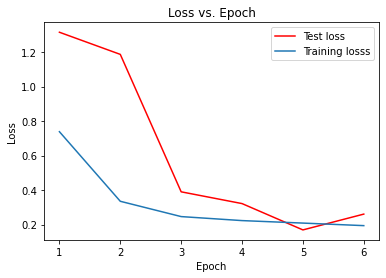

In [51]:
def plot_loss(history):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Test loss')
    plt.plot(x, train_loss, label = 'Training losss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    
plot_loss(history)

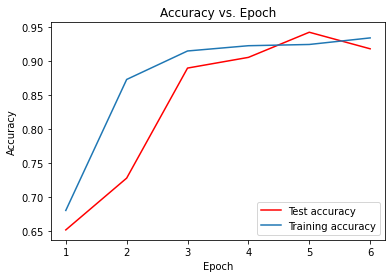

In [52]:
def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Test accuracy')
    plt.plot(x, train_acc, label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    
plot_accuracy(history)

In [35]:
# Load features of data for predictions
inferStartNum = 20000
inferEndNum = 26999


inferenceImagesPath = 'data/inference/features'
allInferenceFeatures = loadImagesAsNpArray(inferenceImagesPath, inferStartNum, inferEndNum)
allInferenceFeatures = allInferenceFeatures.astype('float')/255

# Predictions
inferredLabels = nn.predict_classes(allInferenceFeatures)

Loading image = data/inference/features/20000.jpg
Loading image = data/inference/features/20001.jpg
Loading image = data/inference/features/20002.jpg
Loading image = data/inference/features/20003.jpg
Loading image = data/inference/features/20004.jpg
Loading image = data/inference/features/20005.jpg
Loading image = data/inference/features/20006.jpg
Loading image = data/inference/features/20007.jpg
Loading image = data/inference/features/20008.jpg
Loading image = data/inference/features/20009.jpg
Loading image = data/inference/features/20010.jpg
Loading image = data/inference/features/20011.jpg
Loading image = data/inference/features/20012.jpg
Loading image = data/inference/features/20013.jpg
Loading image = data/inference/features/20014.jpg
Loading image = data/inference/features/20015.jpg
Loading image = data/inference/features/20016.jpg
Loading image = data/inference/features/20017.jpg
Loading image = data/inference/features/20018.jpg
Loading image = data/inference/features/20019.jpg


Loading image = data/inference/features/20237.jpg
Loading image = data/inference/features/20238.jpg
Loading image = data/inference/features/20239.jpg
Loading image = data/inference/features/20240.jpg
Loading image = data/inference/features/20241.jpg
Loading image = data/inference/features/20242.jpg
Loading image = data/inference/features/20243.jpg
Loading image = data/inference/features/20244.jpg
Loading image = data/inference/features/20245.jpg
Loading image = data/inference/features/20246.jpg
Loading image = data/inference/features/20247.jpg
Loading image = data/inference/features/20248.jpg
Loading image = data/inference/features/20249.jpg
Loading image = data/inference/features/20250.jpg
Loading image = data/inference/features/20251.jpg
Loading image = data/inference/features/20252.jpg
Loading image = data/inference/features/20253.jpg
Loading image = data/inference/features/20254.jpg
Loading image = data/inference/features/20255.jpg
Loading image = data/inference/features/20256.jpg


Loading image = data/inference/features/20488.jpg
Loading image = data/inference/features/20489.jpg
Loading image = data/inference/features/20490.jpg
Loading image = data/inference/features/20491.jpg
Loading image = data/inference/features/20492.jpg
Loading image = data/inference/features/20493.jpg
Loading image = data/inference/features/20494.jpg
Loading image = data/inference/features/20495.jpg
Loading image = data/inference/features/20496.jpg
Loading image = data/inference/features/20497.jpg
Loading image = data/inference/features/20498.jpg
Loading image = data/inference/features/20499.jpg
Loading image = data/inference/features/20500.jpg
Loading image = data/inference/features/20501.jpg
Loading image = data/inference/features/20502.jpg
Loading image = data/inference/features/20503.jpg
Loading image = data/inference/features/20504.jpg
Loading image = data/inference/features/20505.jpg
Loading image = data/inference/features/20506.jpg
Loading image = data/inference/features/20507.jpg


Loading image = data/inference/features/20743.jpg
Loading image = data/inference/features/20744.jpg
Loading image = data/inference/features/20745.jpg
Loading image = data/inference/features/20746.jpg
Loading image = data/inference/features/20747.jpg
Loading image = data/inference/features/20748.jpg
Loading image = data/inference/features/20749.jpg
Loading image = data/inference/features/20750.jpg
Loading image = data/inference/features/20751.jpg
Loading image = data/inference/features/20752.jpg
Loading image = data/inference/features/20753.jpg
Loading image = data/inference/features/20754.jpg
Loading image = data/inference/features/20755.jpg
Loading image = data/inference/features/20756.jpg
Loading image = data/inference/features/20757.jpg
Loading image = data/inference/features/20758.jpg
Loading image = data/inference/features/20759.jpg
Loading image = data/inference/features/20760.jpg
Loading image = data/inference/features/20761.jpg
Loading image = data/inference/features/20762.jpg


Loading image = data/inference/features/20996.jpg
Loading image = data/inference/features/20997.jpg
Loading image = data/inference/features/20998.jpg
Loading image = data/inference/features/20999.jpg
Loading image = data/inference/features/21000.jpg
Loading image = data/inference/features/21001.jpg
Loading image = data/inference/features/21002.jpg
Loading image = data/inference/features/21003.jpg
Loading image = data/inference/features/21004.jpg
Loading image = data/inference/features/21005.jpg
Loading image = data/inference/features/21006.jpg
Loading image = data/inference/features/21007.jpg
Loading image = data/inference/features/21008.jpg
Loading image = data/inference/features/21009.jpg
Loading image = data/inference/features/21010.jpg
Loading image = data/inference/features/21011.jpg
Loading image = data/inference/features/21012.jpg
Loading image = data/inference/features/21013.jpg
Loading image = data/inference/features/21014.jpg
Loading image = data/inference/features/21015.jpg


Loading image = data/inference/features/21249.jpg
Loading image = data/inference/features/21250.jpg
Loading image = data/inference/features/21251.jpg
Loading image = data/inference/features/21252.jpg
Loading image = data/inference/features/21253.jpg
Loading image = data/inference/features/21254.jpg
Loading image = data/inference/features/21255.jpg
Loading image = data/inference/features/21256.jpg
Loading image = data/inference/features/21257.jpg
Loading image = data/inference/features/21258.jpg
Loading image = data/inference/features/21259.jpg
Loading image = data/inference/features/21260.jpg
Loading image = data/inference/features/21261.jpg
Loading image = data/inference/features/21262.jpg
Loading image = data/inference/features/21263.jpg
Loading image = data/inference/features/21264.jpg
Loading image = data/inference/features/21265.jpg
Loading image = data/inference/features/21266.jpg
Loading image = data/inference/features/21267.jpg
Loading image = data/inference/features/21268.jpg


Loading image = data/inference/features/21504.jpg
Loading image = data/inference/features/21505.jpg
Loading image = data/inference/features/21506.jpg
Loading image = data/inference/features/21507.jpg
Loading image = data/inference/features/21508.jpg
Loading image = data/inference/features/21509.jpg
Loading image = data/inference/features/21510.jpg
Loading image = data/inference/features/21511.jpg
Loading image = data/inference/features/21512.jpg
Loading image = data/inference/features/21513.jpg
Loading image = data/inference/features/21514.jpg
Loading image = data/inference/features/21515.jpg
Loading image = data/inference/features/21516.jpg
Loading image = data/inference/features/21517.jpg
Loading image = data/inference/features/21518.jpg
Loading image = data/inference/features/21519.jpg
Loading image = data/inference/features/21520.jpg
Loading image = data/inference/features/21521.jpg
Loading image = data/inference/features/21522.jpg
Loading image = data/inference/features/21523.jpg


Loading image = data/inference/features/21755.jpg
Loading image = data/inference/features/21756.jpg
Loading image = data/inference/features/21757.jpg
Loading image = data/inference/features/21758.jpg
Loading image = data/inference/features/21759.jpg
Loading image = data/inference/features/21760.jpg
Loading image = data/inference/features/21761.jpg
Loading image = data/inference/features/21762.jpg
Loading image = data/inference/features/21763.jpg
Loading image = data/inference/features/21764.jpg
Loading image = data/inference/features/21765.jpg
Loading image = data/inference/features/21766.jpg
Loading image = data/inference/features/21767.jpg
Loading image = data/inference/features/21768.jpg
Loading image = data/inference/features/21769.jpg
Loading image = data/inference/features/21770.jpg
Loading image = data/inference/features/21771.jpg
Loading image = data/inference/features/21772.jpg
Loading image = data/inference/features/21773.jpg
Loading image = data/inference/features/21774.jpg


Loading image = data/inference/features/22000.jpg
Loading image = data/inference/features/22001.jpg
Loading image = data/inference/features/22002.jpg
Loading image = data/inference/features/22003.jpg
Loading image = data/inference/features/22004.jpg
Loading image = data/inference/features/22005.jpg
Loading image = data/inference/features/22006.jpg
Loading image = data/inference/features/22007.jpg
Loading image = data/inference/features/22008.jpg
Loading image = data/inference/features/22009.jpg
Loading image = data/inference/features/22010.jpg
Loading image = data/inference/features/22011.jpg
Loading image = data/inference/features/22012.jpg
Loading image = data/inference/features/22013.jpg
Loading image = data/inference/features/22014.jpg
Loading image = data/inference/features/22015.jpg
Loading image = data/inference/features/22016.jpg
Loading image = data/inference/features/22017.jpg
Loading image = data/inference/features/22018.jpg
Loading image = data/inference/features/22019.jpg


Loading image = data/inference/features/22255.jpg
Loading image = data/inference/features/22256.jpg
Loading image = data/inference/features/22257.jpg
Loading image = data/inference/features/22258.jpg
Loading image = data/inference/features/22259.jpg
Loading image = data/inference/features/22260.jpg
Loading image = data/inference/features/22261.jpg
Loading image = data/inference/features/22262.jpg
Loading image = data/inference/features/22263.jpg
Loading image = data/inference/features/22264.jpg
Loading image = data/inference/features/22265.jpg
Loading image = data/inference/features/22266.jpg
Loading image = data/inference/features/22267.jpg
Loading image = data/inference/features/22268.jpg
Loading image = data/inference/features/22269.jpg
Loading image = data/inference/features/22270.jpg
Loading image = data/inference/features/22271.jpg
Loading image = data/inference/features/22272.jpg
Loading image = data/inference/features/22273.jpg
Loading image = data/inference/features/22274.jpg


Loading image = data/inference/features/22502.jpg
Loading image = data/inference/features/22503.jpg
Loading image = data/inference/features/22504.jpg
Loading image = data/inference/features/22505.jpg
Loading image = data/inference/features/22506.jpg
Loading image = data/inference/features/22507.jpg
Loading image = data/inference/features/22508.jpg
Loading image = data/inference/features/22509.jpg
Loading image = data/inference/features/22510.jpg
Loading image = data/inference/features/22511.jpg
Loading image = data/inference/features/22512.jpg
Loading image = data/inference/features/22513.jpg
Loading image = data/inference/features/22514.jpg
Loading image = data/inference/features/22515.jpg
Loading image = data/inference/features/22516.jpg
Loading image = data/inference/features/22517.jpg
Loading image = data/inference/features/22518.jpg
Loading image = data/inference/features/22519.jpg
Loading image = data/inference/features/22520.jpg
Loading image = data/inference/features/22521.jpg


Loading image = data/inference/features/22746.jpg
Loading image = data/inference/features/22747.jpg
Loading image = data/inference/features/22748.jpg
Loading image = data/inference/features/22749.jpg
Loading image = data/inference/features/22750.jpg
Loading image = data/inference/features/22751.jpg
Loading image = data/inference/features/22752.jpg
Loading image = data/inference/features/22753.jpg
Loading image = data/inference/features/22754.jpg
Loading image = data/inference/features/22755.jpg
Loading image = data/inference/features/22756.jpg
Loading image = data/inference/features/22757.jpg
Loading image = data/inference/features/22758.jpg
Loading image = data/inference/features/22759.jpg
Loading image = data/inference/features/22760.jpg
Loading image = data/inference/features/22761.jpg
Loading image = data/inference/features/22762.jpg
Loading image = data/inference/features/22763.jpg
Loading image = data/inference/features/22764.jpg
Loading image = data/inference/features/22765.jpg


Loading image = data/inference/features/22999.jpg
Loading image = data/inference/features/23000.jpg
Loading image = data/inference/features/23001.jpg
Loading image = data/inference/features/23002.jpg
Loading image = data/inference/features/23003.jpg
Loading image = data/inference/features/23004.jpg
Loading image = data/inference/features/23005.jpg
Loading image = data/inference/features/23006.jpg
Loading image = data/inference/features/23007.jpg
Loading image = data/inference/features/23008.jpg
Loading image = data/inference/features/23009.jpg
Loading image = data/inference/features/23010.jpg
Loading image = data/inference/features/23011.jpg
Loading image = data/inference/features/23012.jpg
Loading image = data/inference/features/23013.jpg
Loading image = data/inference/features/23014.jpg
Loading image = data/inference/features/23015.jpg
Loading image = data/inference/features/23016.jpg
Loading image = data/inference/features/23017.jpg
Loading image = data/inference/features/23018.jpg


Loading image = data/inference/features/23252.jpg
Loading image = data/inference/features/23253.jpg
Loading image = data/inference/features/23254.jpg
Loading image = data/inference/features/23255.jpg
Loading image = data/inference/features/23256.jpg
Loading image = data/inference/features/23257.jpg
Loading image = data/inference/features/23258.jpg
Loading image = data/inference/features/23259.jpg
Loading image = data/inference/features/23260.jpg
Loading image = data/inference/features/23261.jpg
Loading image = data/inference/features/23262.jpg
Loading image = data/inference/features/23263.jpg
Loading image = data/inference/features/23264.jpg
Loading image = data/inference/features/23265.jpg
Loading image = data/inference/features/23266.jpg
Loading image = data/inference/features/23267.jpg
Loading image = data/inference/features/23268.jpg
Loading image = data/inference/features/23269.jpg
Loading image = data/inference/features/23270.jpg
Loading image = data/inference/features/23271.jpg


Loading image = data/inference/features/23504.jpg
Loading image = data/inference/features/23505.jpg
Loading image = data/inference/features/23506.jpg
Loading image = data/inference/features/23507.jpg
Loading image = data/inference/features/23508.jpg
Loading image = data/inference/features/23509.jpg
Loading image = data/inference/features/23510.jpg
Loading image = data/inference/features/23511.jpg
Loading image = data/inference/features/23512.jpg
Loading image = data/inference/features/23513.jpg
Loading image = data/inference/features/23514.jpg
Loading image = data/inference/features/23515.jpg
Loading image = data/inference/features/23516.jpg
Loading image = data/inference/features/23517.jpg
Loading image = data/inference/features/23518.jpg
Loading image = data/inference/features/23519.jpg
Loading image = data/inference/features/23520.jpg
Loading image = data/inference/features/23521.jpg
Loading image = data/inference/features/23522.jpg
Loading image = data/inference/features/23523.jpg


Loading image = data/inference/features/23753.jpg
Loading image = data/inference/features/23754.jpg
Loading image = data/inference/features/23755.jpg
Loading image = data/inference/features/23756.jpg
Loading image = data/inference/features/23757.jpg
Loading image = data/inference/features/23758.jpg
Loading image = data/inference/features/23759.jpg
Loading image = data/inference/features/23760.jpg
Loading image = data/inference/features/23761.jpg
Loading image = data/inference/features/23762.jpg
Loading image = data/inference/features/23763.jpg
Loading image = data/inference/features/23764.jpg
Loading image = data/inference/features/23765.jpg
Loading image = data/inference/features/23766.jpg
Loading image = data/inference/features/23767.jpg
Loading image = data/inference/features/23768.jpg
Loading image = data/inference/features/23769.jpg
Loading image = data/inference/features/23770.jpg
Loading image = data/inference/features/23771.jpg
Loading image = data/inference/features/23772.jpg


Loading image = data/inference/features/24005.jpg
Loading image = data/inference/features/24006.jpg
Loading image = data/inference/features/24007.jpg
Loading image = data/inference/features/24008.jpg
Loading image = data/inference/features/24009.jpg
Loading image = data/inference/features/24010.jpg
Loading image = data/inference/features/24011.jpg
Loading image = data/inference/features/24012.jpg
Loading image = data/inference/features/24013.jpg
Loading image = data/inference/features/24014.jpg
Loading image = data/inference/features/24015.jpg
Loading image = data/inference/features/24016.jpg
Loading image = data/inference/features/24017.jpg
Loading image = data/inference/features/24018.jpg
Loading image = data/inference/features/24019.jpg
Loading image = data/inference/features/24020.jpg
Loading image = data/inference/features/24021.jpg
Loading image = data/inference/features/24022.jpg
Loading image = data/inference/features/24023.jpg
Loading image = data/inference/features/24024.jpg


Loading image = data/inference/features/24254.jpg
Loading image = data/inference/features/24255.jpg
Loading image = data/inference/features/24256.jpg
Loading image = data/inference/features/24257.jpg
Loading image = data/inference/features/24258.jpg
Loading image = data/inference/features/24259.jpg
Loading image = data/inference/features/24260.jpg
Loading image = data/inference/features/24261.jpg
Loading image = data/inference/features/24262.jpg
Loading image = data/inference/features/24263.jpg
Loading image = data/inference/features/24264.jpg
Loading image = data/inference/features/24265.jpg
Loading image = data/inference/features/24266.jpg
Loading image = data/inference/features/24267.jpg
Loading image = data/inference/features/24268.jpg
Loading image = data/inference/features/24269.jpg
Loading image = data/inference/features/24270.jpg
Loading image = data/inference/features/24271.jpg
Loading image = data/inference/features/24272.jpg
Loading image = data/inference/features/24273.jpg


Loading image = data/inference/features/24504.jpg
Loading image = data/inference/features/24505.jpg
Loading image = data/inference/features/24506.jpg
Loading image = data/inference/features/24507.jpg
Loading image = data/inference/features/24508.jpg
Loading image = data/inference/features/24509.jpg
Loading image = data/inference/features/24510.jpg
Loading image = data/inference/features/24511.jpg
Loading image = data/inference/features/24512.jpg
Loading image = data/inference/features/24513.jpg
Loading image = data/inference/features/24514.jpg
Loading image = data/inference/features/24515.jpg
Loading image = data/inference/features/24516.jpg
Loading image = data/inference/features/24517.jpg
Loading image = data/inference/features/24518.jpg
Loading image = data/inference/features/24519.jpg
Loading image = data/inference/features/24520.jpg
Loading image = data/inference/features/24521.jpg
Loading image = data/inference/features/24522.jpg
Loading image = data/inference/features/24523.jpg


Loading image = data/inference/features/24753.jpg
Loading image = data/inference/features/24754.jpg
Loading image = data/inference/features/24755.jpg
Loading image = data/inference/features/24756.jpg
Loading image = data/inference/features/24757.jpg
Loading image = data/inference/features/24758.jpg
Loading image = data/inference/features/24759.jpg
Loading image = data/inference/features/24760.jpg
Loading image = data/inference/features/24761.jpg
Loading image = data/inference/features/24762.jpg
Loading image = data/inference/features/24763.jpg
Loading image = data/inference/features/24764.jpg
Loading image = data/inference/features/24765.jpg
Loading image = data/inference/features/24766.jpg
Loading image = data/inference/features/24767.jpg
Loading image = data/inference/features/24768.jpg
Loading image = data/inference/features/24769.jpg
Loading image = data/inference/features/24770.jpg
Loading image = data/inference/features/24771.jpg
Loading image = data/inference/features/24772.jpg


Loading image = data/inference/features/25005.jpg
Loading image = data/inference/features/25006.jpg
Loading image = data/inference/features/25007.jpg
Loading image = data/inference/features/25008.jpg
Loading image = data/inference/features/25009.jpg
Loading image = data/inference/features/25010.jpg
Loading image = data/inference/features/25011.jpg
Loading image = data/inference/features/25012.jpg
Loading image = data/inference/features/25013.jpg
Loading image = data/inference/features/25014.jpg
Loading image = data/inference/features/25015.jpg
Loading image = data/inference/features/25016.jpg
Loading image = data/inference/features/25017.jpg
Loading image = data/inference/features/25018.jpg
Loading image = data/inference/features/25019.jpg
Loading image = data/inference/features/25020.jpg
Loading image = data/inference/features/25021.jpg
Loading image = data/inference/features/25022.jpg
Loading image = data/inference/features/25023.jpg
Loading image = data/inference/features/25024.jpg


Loading image = data/inference/features/25258.jpg
Loading image = data/inference/features/25259.jpg
Loading image = data/inference/features/25260.jpg
Loading image = data/inference/features/25261.jpg
Loading image = data/inference/features/25262.jpg
Loading image = data/inference/features/25263.jpg
Loading image = data/inference/features/25264.jpg
Loading image = data/inference/features/25265.jpg
Loading image = data/inference/features/25266.jpg
Loading image = data/inference/features/25267.jpg
Loading image = data/inference/features/25268.jpg
Loading image = data/inference/features/25269.jpg
Loading image = data/inference/features/25270.jpg
Loading image = data/inference/features/25271.jpg
Loading image = data/inference/features/25272.jpg
Loading image = data/inference/features/25273.jpg
Loading image = data/inference/features/25274.jpg
Loading image = data/inference/features/25275.jpg
Loading image = data/inference/features/25276.jpg
Loading image = data/inference/features/25277.jpg


Loading image = data/inference/features/25513.jpg
Loading image = data/inference/features/25514.jpg
Loading image = data/inference/features/25515.jpg
Loading image = data/inference/features/25516.jpg
Loading image = data/inference/features/25517.jpg
Loading image = data/inference/features/25518.jpg
Loading image = data/inference/features/25519.jpg
Loading image = data/inference/features/25520.jpg
Loading image = data/inference/features/25521.jpg
Loading image = data/inference/features/25522.jpg
Loading image = data/inference/features/25523.jpg
Loading image = data/inference/features/25524.jpg
Loading image = data/inference/features/25525.jpg
Loading image = data/inference/features/25526.jpg
Loading image = data/inference/features/25527.jpg
Loading image = data/inference/features/25528.jpg
Loading image = data/inference/features/25529.jpg
Loading image = data/inference/features/25530.jpg
Loading image = data/inference/features/25531.jpg
Loading image = data/inference/features/25532.jpg


Loading image = data/inference/features/25763.jpg
Loading image = data/inference/features/25764.jpg
Loading image = data/inference/features/25765.jpg
Loading image = data/inference/features/25766.jpg
Loading image = data/inference/features/25767.jpg
Loading image = data/inference/features/25768.jpg
Loading image = data/inference/features/25769.jpg
Loading image = data/inference/features/25770.jpg
Loading image = data/inference/features/25771.jpg
Loading image = data/inference/features/25772.jpg
Loading image = data/inference/features/25773.jpg
Loading image = data/inference/features/25774.jpg
Loading image = data/inference/features/25775.jpg
Loading image = data/inference/features/25776.jpg
Loading image = data/inference/features/25777.jpg
Loading image = data/inference/features/25778.jpg
Loading image = data/inference/features/25779.jpg
Loading image = data/inference/features/25780.jpg
Loading image = data/inference/features/25781.jpg
Loading image = data/inference/features/25782.jpg


Loading image = data/inference/features/26016.jpg
Loading image = data/inference/features/26017.jpg
Loading image = data/inference/features/26018.jpg
Loading image = data/inference/features/26019.jpg
Loading image = data/inference/features/26020.jpg
Loading image = data/inference/features/26021.jpg
Loading image = data/inference/features/26022.jpg
Loading image = data/inference/features/26023.jpg
Loading image = data/inference/features/26024.jpg
Loading image = data/inference/features/26025.jpg
Loading image = data/inference/features/26026.jpg
Loading image = data/inference/features/26027.jpg
Loading image = data/inference/features/26028.jpg
Loading image = data/inference/features/26029.jpg
Loading image = data/inference/features/26030.jpg
Loading image = data/inference/features/26031.jpg
Loading image = data/inference/features/26032.jpg
Loading image = data/inference/features/26033.jpg
Loading image = data/inference/features/26034.jpg
Loading image = data/inference/features/26035.jpg


Loading image = data/inference/features/26270.jpg
Loading image = data/inference/features/26271.jpg
Loading image = data/inference/features/26272.jpg
Loading image = data/inference/features/26273.jpg
Loading image = data/inference/features/26274.jpg
Loading image = data/inference/features/26275.jpg
Loading image = data/inference/features/26276.jpg
Loading image = data/inference/features/26277.jpg
Loading image = data/inference/features/26278.jpg
Loading image = data/inference/features/26279.jpg
Loading image = data/inference/features/26280.jpg
Loading image = data/inference/features/26281.jpg
Loading image = data/inference/features/26282.jpg
Loading image = data/inference/features/26283.jpg
Loading image = data/inference/features/26284.jpg
Loading image = data/inference/features/26285.jpg
Loading image = data/inference/features/26286.jpg
Loading image = data/inference/features/26287.jpg
Loading image = data/inference/features/26288.jpg
Loading image = data/inference/features/26289.jpg


Loading image = data/inference/features/26524.jpg
Loading image = data/inference/features/26525.jpg
Loading image = data/inference/features/26526.jpg
Loading image = data/inference/features/26527.jpg
Loading image = data/inference/features/26528.jpg
Loading image = data/inference/features/26529.jpg
Loading image = data/inference/features/26530.jpg
Loading image = data/inference/features/26531.jpg
Loading image = data/inference/features/26532.jpg
Loading image = data/inference/features/26533.jpg
Loading image = data/inference/features/26534.jpg
Loading image = data/inference/features/26535.jpg
Loading image = data/inference/features/26536.jpg
Loading image = data/inference/features/26537.jpg
Loading image = data/inference/features/26538.jpg
Loading image = data/inference/features/26539.jpg
Loading image = data/inference/features/26540.jpg
Loading image = data/inference/features/26541.jpg
Loading image = data/inference/features/26542.jpg
Loading image = data/inference/features/26543.jpg


Loading image = data/inference/features/26777.jpg
Loading image = data/inference/features/26778.jpg
Loading image = data/inference/features/26779.jpg
Loading image = data/inference/features/26780.jpg
Loading image = data/inference/features/26781.jpg
Loading image = data/inference/features/26782.jpg
Loading image = data/inference/features/26783.jpg
Loading image = data/inference/features/26784.jpg
Loading image = data/inference/features/26785.jpg
Loading image = data/inference/features/26786.jpg
Loading image = data/inference/features/26787.jpg
Loading image = data/inference/features/26788.jpg
Loading image = data/inference/features/26789.jpg
Loading image = data/inference/features/26790.jpg
Loading image = data/inference/features/26791.jpg
Loading image = data/inference/features/26792.jpg
Loading image = data/inference/features/26793.jpg
Loading image = data/inference/features/26794.jpg
Loading image = data/inference/features/26795.jpg
Loading image = data/inference/features/26796.jpg


In [43]:
# Write results to a file
predicationsPath = 'data/inference'
with open(predicationsPath + '/predictions.csv','w') as outFile:
    outFile.write("filename,infected" + '\n')
    for imgIndex in range(inferredLabels.shape[0]):
        imgNumber = inferStartNum + imgIndex
        outFile.write(str(imgNumber) + '.jpg,' + str(inferredLabels[imgIndex]))
        if(imgIndex != inferredLabels.shape[0]-1):
            outFile.write('\n')